# Двухжидкостная неустойчивость в NGC 1167 (UGC 2487)

Галактика из диплома.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
from PIL import Image as ImagePIL

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N1167'
gtype = 'S0(A)' #CALIFA
incl = 36.0  #Zasov, in LEDA 49deg, CALIFA 42deg TODO: check, хотя разброс и не влияет на результат сильно
scale = 0.321 #kpc/arcsec from NED

data_path = '../../data/ngc1167'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи
TODO ссылки
* Zasov 2008 https://ui.adsabs.harvard.edu/#abs/2008ARep...52...79Z/abstract
* Noordermeer&Hulst 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract
* Bell 2003 https://ui.adsabs.harvard.edu/#abs/2003ApJS..149..289B/abstract

## Разное

In [7]:
os.chdir(data_path)

In [8]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+1167&extend=no&hconst=73&omegam=0.27&omegav=0.73\
&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=30000.0&list_limit=5\
&img_stamp=YES width=1000 height=350></iframe>')

In [9]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc1167 width=1000 height=350></iframe>')

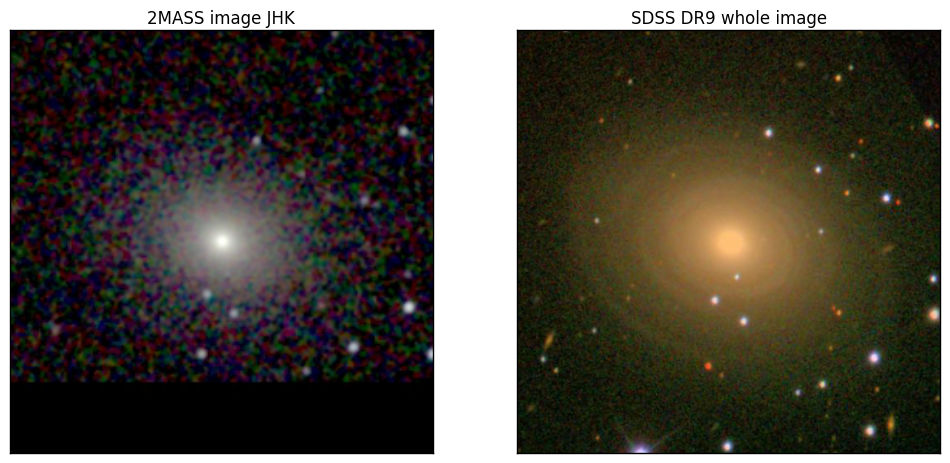

In [10]:
fig, subplot = plt.subplots(1, 2, figsize=[12, 12])
subplot[0].imshow(np.asarray(ImagePIL.open("ngc1167_JHK.jpg")))
subplot[0].set_title("2MASS image JHK")
subplot[0].set_xticks([]);subplot[0].set_yticks([])
subplot[1].imshow(np.asarray(ImagePIL.open("ngc1167_SDSS.jpeg")))
subplot[1].set_title("SDSS DR9 whole image")
subplot[1].set_xticks([]);subplot[1].set_yticks([]);

### Из своих записок (см. pdf):
>Фотометрия в B и R дают согласованные значения центральной поверхностной плотности для диска.
Галактика раннего типа. В диске наблюдаются туго закрученные тонкие ветви (SDSS). Излучение Hα только в
центре. На профиле яркости в полосе B никаких особенностей. У галактики много газа. Интегрально MHI = 1.65·1010M⊙ . Но газ распределен широко, и значения поверхностной плотности низкие, даже в области газового кольца примерно на 60 arсseс.
Газовая (WSRT) и звездная кинематика плохо согласуются (точки на звездной кривой вращения лежат выше
точек на газовой кривой вращения). Профиль дисперсии скоростей σR восстанавливать через σlos .

### Noordermeer thesis data:

p.37:
>UGC 2487 (NGC 1167) is a nice example of an S0 galaxy with an extended and regularly
rotating HI disk. The gas seems to be in circular motion at radii up till 80 kpc. The central
hole does not reflect a true absence of gas, but is rather the result of absorption against a
central continuum source.

p.110:
>UGC 2487 (NGC 1167) is the most luminous galaxy in our sample ($M_{lim,R}$ = −23.24). It is
an almost perfect superposition of an exponential disk and a Sersic bulge; the residuals with
respect to the fitted bulge and disk profiles are less than 0.05 mag $arcsec^{−2}$
everywhere. Some very faint spiral structure is visible in the disk.

Сейфертовская галактика? p.165:
>Category II contains galaxies with, for example, mild
asymmetries, bar-induced streaming motions or signs of interactions or tidal distortions, as
well as galaxies for which the orientation angles cannot be determined with sufficient accuracy.
The following galaxies were classed as category II: UGC 2487 (Seyfert nucleus) ...

TODO: снять с большого количества кривых вращения кривую, это \#2

да, Сейфертовская, p.183:
>UGC 2487 (NGC 1167) is a giant S0 galaxy (MB = −21.88, D
B
25 = 54 kpc; see table 3.4)
with an extended, highly regular gas disk. We can trace the HI rotation curve out to radii of
80 kpc (10 R-band disk scale lengths) and although there is a small decline in the rotation
velocities, they remain well above 300 km/s till the outermost point. The total mass enclosed
within the last measured point is Menc = 2.1 · 1012 M, which makes UGC 2487 the most
massive galaxy in our sample. The total enclosed mass is larger even than those in the giant
Sc galaxies NGC 2916 and UGC 2885 (Rubin et al. 1979; Roelfsema & Allen 1985, note that
in both papers a Hubble constant of H0 = 50 km s
−1 Mpc−1
is assumed; their derived masses
have to be divided by 1.5 when using our value of 75 km s
−1 Mpc−1
); to our knowledge, it
is the largest mass ever derived from a rotation curve. Saglia & Sancisi (1988) list a number
of other large disk galaxies with extremely high rotation velocities; some of those galaxies
may be even more massive than UGC 2487, but since no spatially resolved rotation curves
are available for these systems, no accurate values for the total masses can be derived. In
any case, UGC 2487 seems member of a class of extremely massive disk galaxies (see also
Giovanelli et al. 1986; Carignan et al. 1997), with masses that rival those of the most massive
elliptical galaxies (e.g. Bertin et al. 1988; Minniti et al. 1998).

>UGC 2487 is also classified as a Seyfert galaxy, explaining the broad emission lines in the
nucleus (cf. Filippenko & Sargent 1985). It has a central compact steep spectrum (CSS) radio
source (e.g. Sanghera et al. 1995; Giovannini et al. 2001), which is responsible for the H
absorption in the center. Away from the bright nucleus, we detect some very faint emission
in the optical spectrum. Although this emission seems to follow the general sense of rotation
of the galaxy, the emission profiles are broad and do not have well-defined peaks. From these
data alone, it is difficult to determine whether this faint emission traces regular rotation in the
circumnuclear regions, or whether it is related to outflows from the active nucleus. Thus, this
emission gives no useful information on the shape of the potential in the inner regions and
we have decided not to use it in the derivation of the rotation curve. A small HII region is
detected 3000 away from the center on the approaching side; the emission from this region has
regular line profiles and its velocity is consistent with the rotation velocities of the H at the
corresponding location.

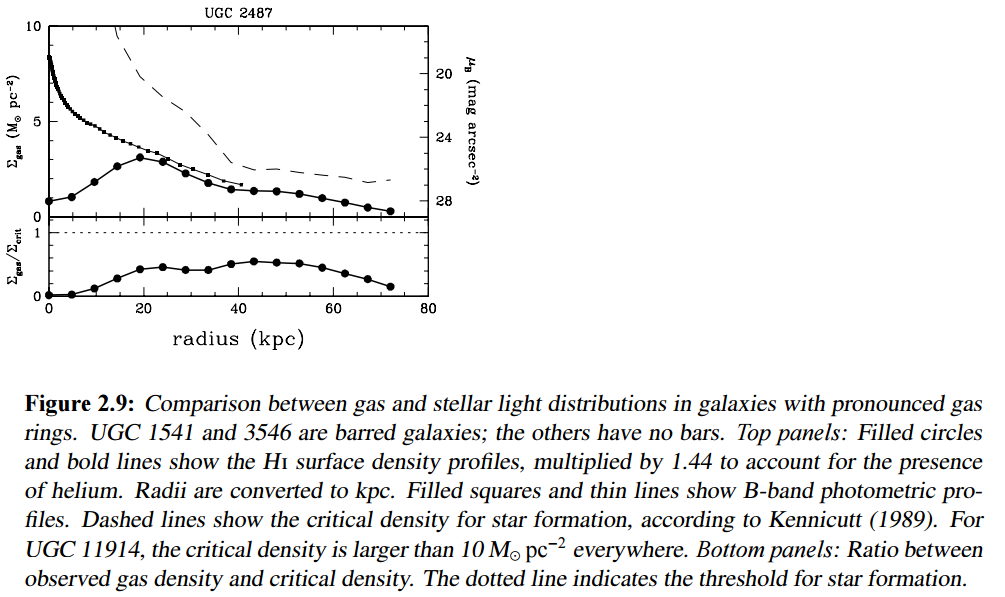

In [11]:
Image('noord_pics/instab.png')

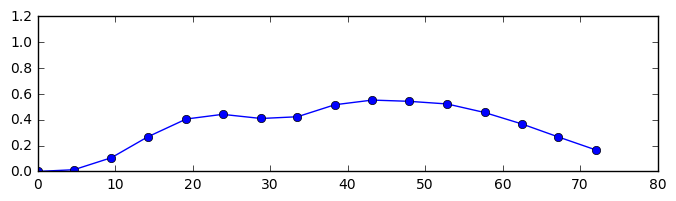

In [12]:
r_q_n, q_n = zip(*np.loadtxt("Q1F_from_webplotdigitizer.dat", float, delimiter=','))
fig = plt.figure(figsize=[8,2])
plt.plot(r_q_n, q_n, 'o-')
plt.xlim(0, 80)
plt.ylim(0, 1.2);

TODO: добавить остальные данные Ноордермеера и подчистить их

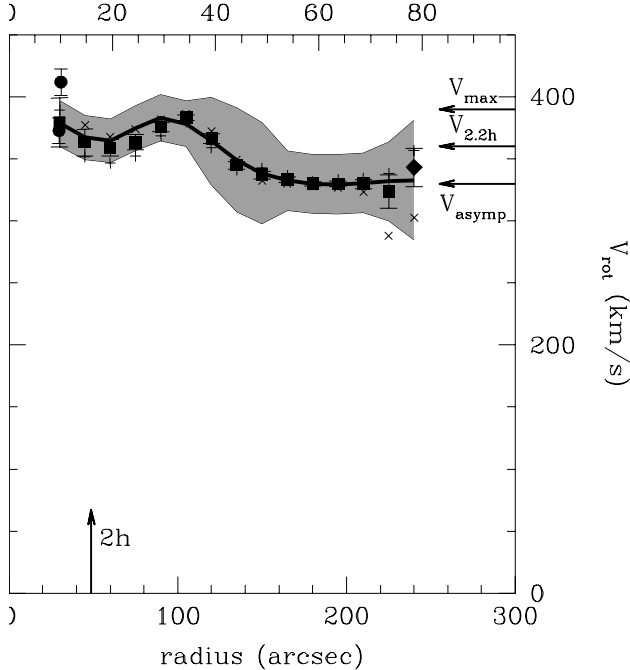

In [13]:
Image('noord_pics/rot_vel.png', width=400)

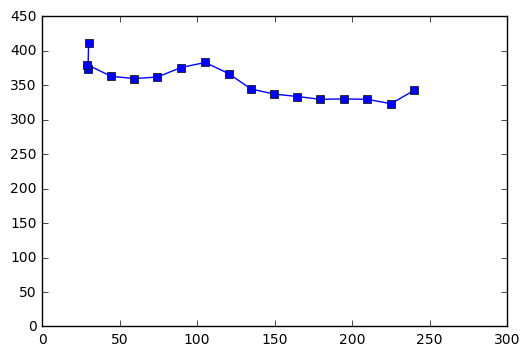

In [14]:
r_ma_n, vel_ma_n = zip(*np.loadtxt("v_gas_from_webplotdigitizer.dat", float, delimiter=','))
plt.plot(r_ma_n, vel_ma_n, 's-')
plt.xlim(0, 300)
plt.ylim(0, 450);

TODO: статья Струве, просмотреть

## Кинематические данные по звездам

###  Кривая вращения

Данные Засов (данные Катков или Моисеев):

TODO: добавить данные Засова в работу

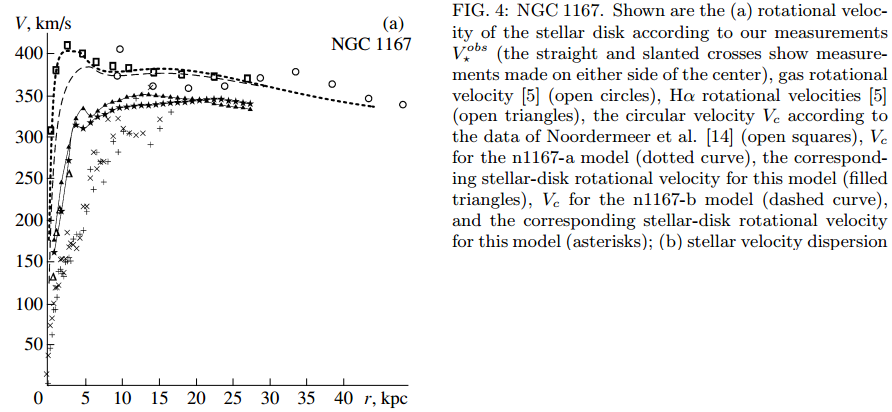

In [15]:
Image('zasov_pics/rot_vel.png')

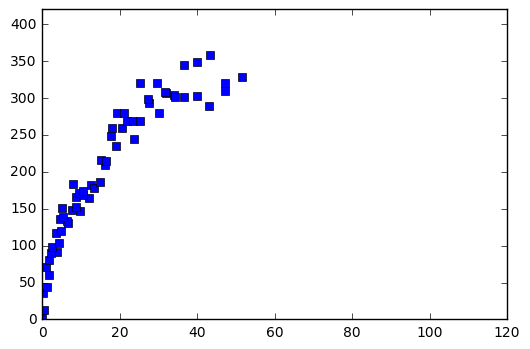

In [16]:
r_ma_z, vel_ma_z = zip(*np.loadtxt("v_stars_from_webplotdigitizer_zasov.dat", float, delimiter=','))
plt.plot(r_ma_z, vel_ma_z, 's')
plt.xlim(0, 120)
plt.ylim(0, 420);

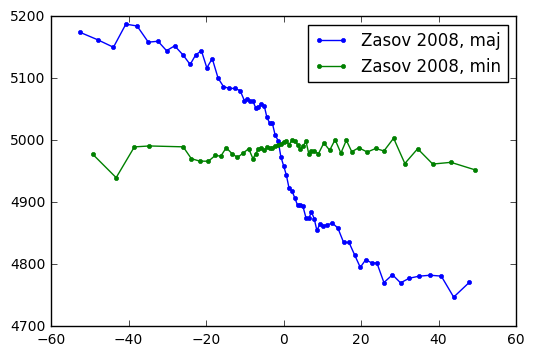

In [17]:
# Данные по звездной кинематике Засова 2012 вдоль большей полуоси, не исправленные за наклон 
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_maZ.dat", float))

# Данные по звездной кинематике Засова 2012 вдоль малой полуоси, не исправленные за наклон 
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_miZ.dat", float))

plt.plot(r_ma, vel_ma, '.-', label="Zasov 2008, maj")
plt.plot(r_mi, vel_mi, '.-', label="Zasov 2008, min")
plt.legend();

In [18]:
%run ../../utils/rotvelutils #import util functions for rotcurv correction

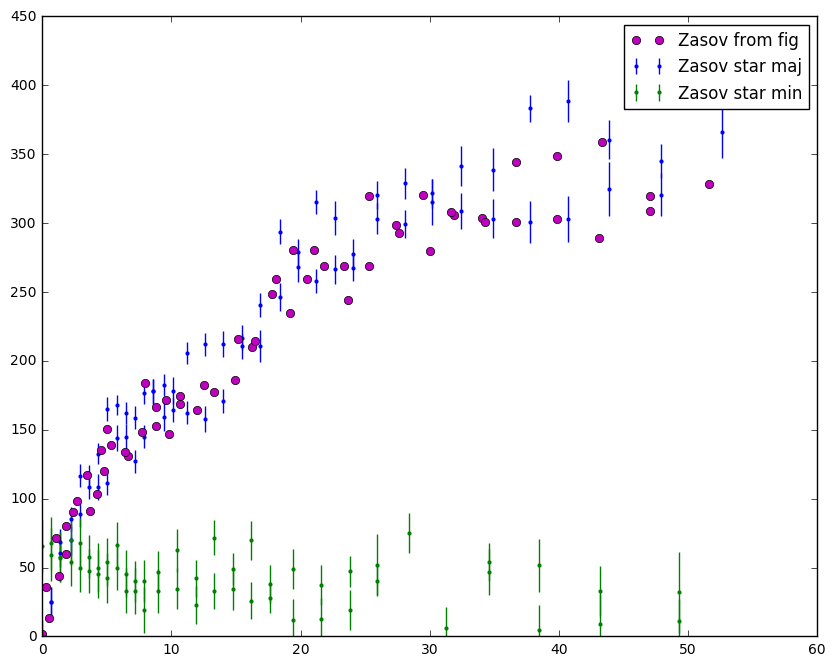

In [19]:
v0 = 4959.3 #TODO: вспомнить, как нормально называется эта величина
r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, v0, incl)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0.0, v0, incl)

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, color='green', label = 'Zasov star min')
plt.plot(r_ma_z, vel_ma_z, 'o', color='m', label='Zasov from fig')
plt.legend()
plt.ylim(0, 450);

Похоже, но не слишком. Ладно, большой роли в анализе это играть не должно. 

Теперь приближения:

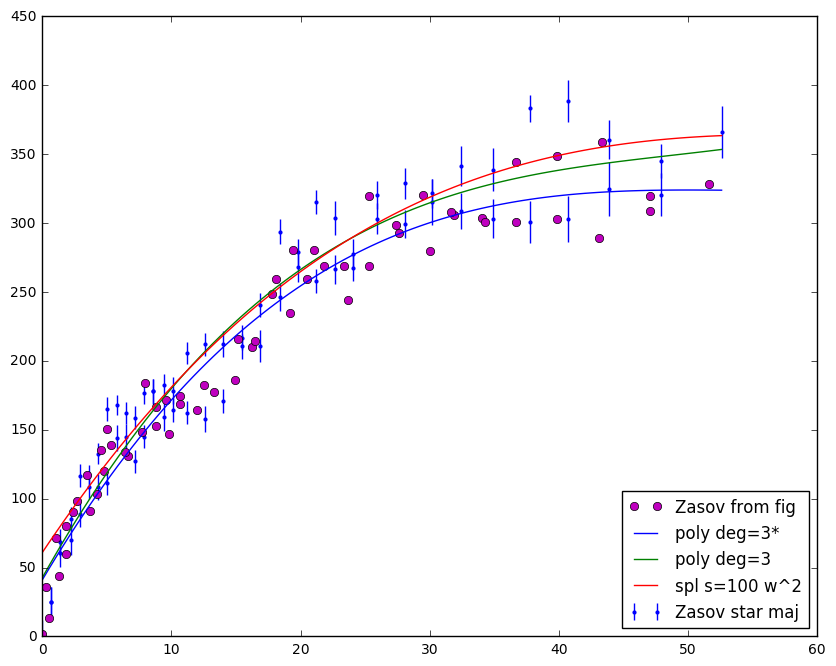

In [20]:
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')
plt.plot(r_ma_z, vel_ma_z, 'o', color='m', label='Zasov from fig')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_z, vel_ma_z, deg=3))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=3*')

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=3))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=3')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter
spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=100., w=w(e_vel_b))
plt.plot(test_points, spl(test_points), '-', label='spl s=100 w^2')

plt.legend(loc='lower right')
plt.ylim(0, 450);

TODO: посмотреть аппроксимации, выбрать наиболее нормальную, границы опять же

In [21]:
star_approx = poly1d(polyfit(r_ma_b, vel_ma_b, deg=3))

### Дисперсии

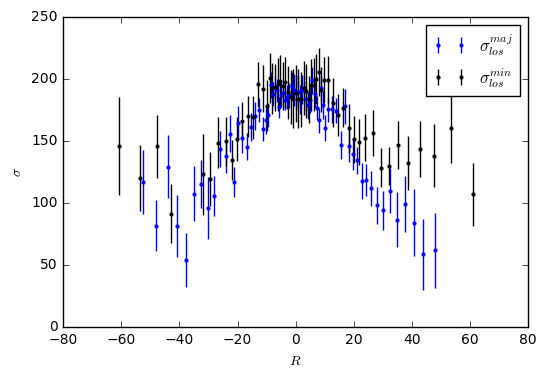

In [22]:
#TODO: свидетельство того, что надо раздвигать

# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label='$\sigma_{los}^{maj}$')
r_mi_extend = map(correct_min, r_mi)
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min}$')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend();

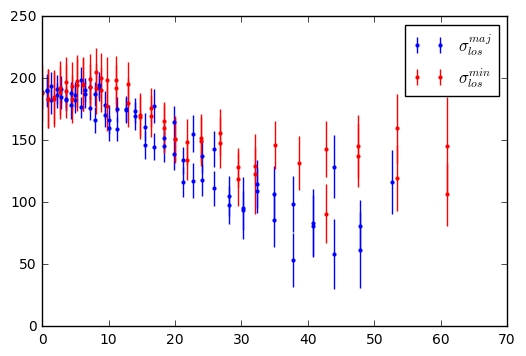

In [23]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = sorted(zip(r_ma, sig_ma, e_sig_ma))
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
radii_maj, sig_maj_p, e_sig_maj_p = zip(*sig_maj_data) 

sig_min_data = sorted(zip(r_mi_extend, sig_mi, e_sig_mi))
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
radii_min, sig_min_p, e_sig_min_p = zip(*sig_min_data)

points = np.arange(0, max(radii_min), 0.1)
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue', label='$\sigma_{los}^{maj}$')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
plt.legend()
plt.ylim(0,250)
plt.xlim(0,70);

In [24]:
r_sig_ma, sig_ma, e_sig_ma = radii_maj, sig_maj_p, e_sig_maj_p

r_sig_mi, sig_mi, e_sig_mi = radii_min, sig_min_p, e_sig_min_p

spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=7000.)
sig_min_lim = max(r_sig_mi)

# hack for smooth at the end
spl_maj = inter.UnivariateSpline(r_sig_ma[:-2] + tuple(np.linspace(53, 60, 10)), sig_ma[:-2] + tuple(np.linspace(90, 80, 10)), k=3, s=10000.)
# spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=10000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

In [25]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

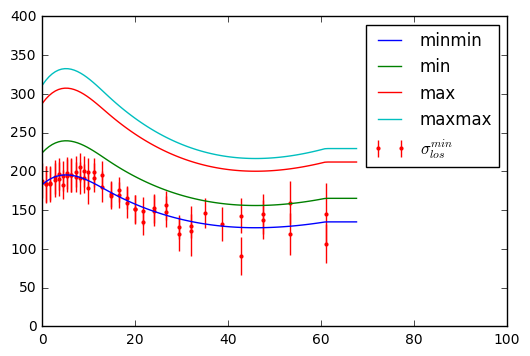

In [26]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

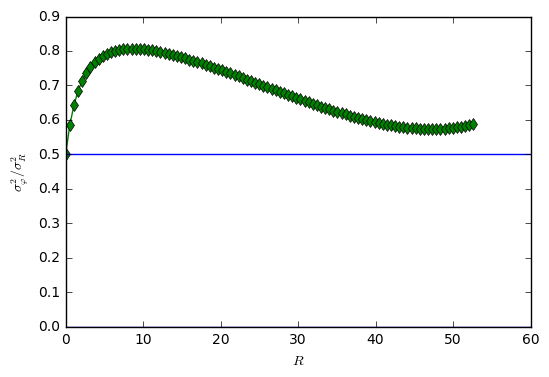

In [27]:
def sigPhi_to_sigR_real(R):
    try:
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))
    except:
        return 0.5 * (1 + R*star_approx.deriv()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0);

По большой:

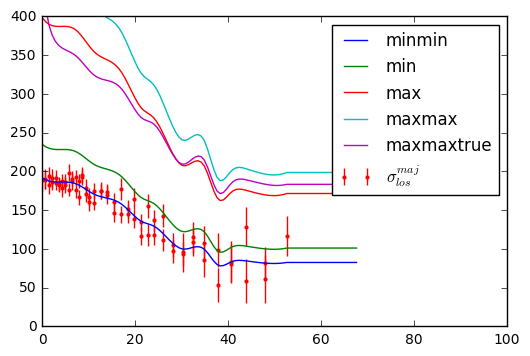

In [28]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Сравним major vs minor оценки:

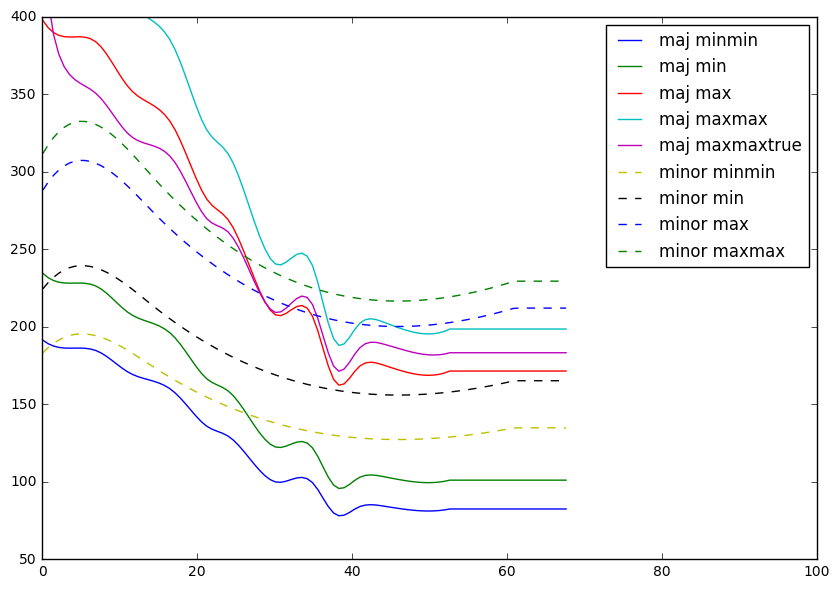

In [29]:
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,400)
plt.xlim(0,100);

Достаточно кривое получилось, ну да не страшно.

Нанесем также из пред работы (правда в предыдущей работе были получены величины $\sigma_R$ на двух участках, которые не особо согласуются друг с другом, что плохо):

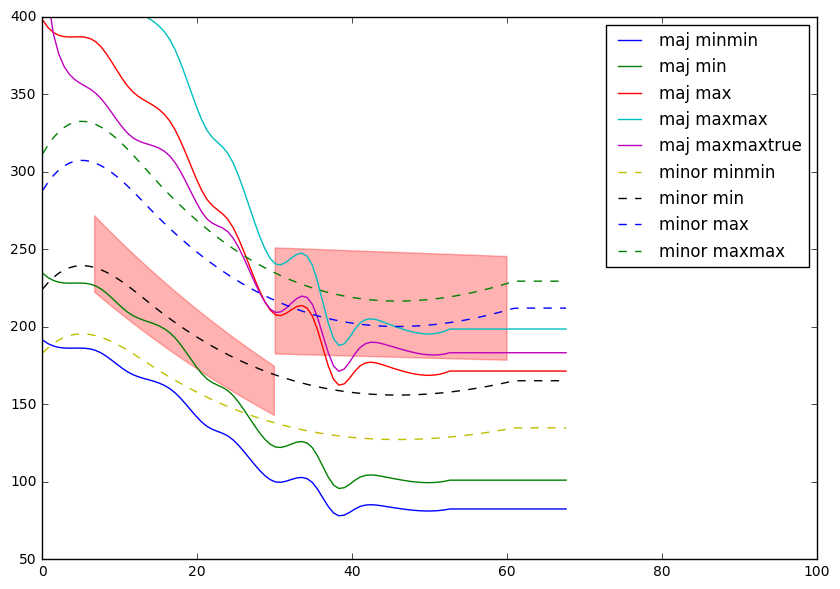

In [30]:
am1 = 0.72
dam1 = 0.09
sm1 = 281.
dsm1 = 28.
hkin1 = 52.6

am2 = 0.3
dam2 = 0.08
sm2 = 222.
dsm2 = 35.
hkin2 = 1343.

def sigR_ger_exp(R, sig_R_0, h_kin):
    return sig_R_0*exp(-R/h_kin)

fig = plt.figure(figsize=[10, 7])

points_ = np.arange(6.7, 30., 0.1)
# alpha = am1
# sig_R_0 = sm1
# h_kin = hkin1 
# plt.plot(points, [sigR_ger_exp(l, sm1, hkin1) for l in points], ls='-', color='red')

# alpha = am1-dam1
# sig_R_0 = sm1-dsm1
# plt.plot(points, [sigR_ger_exp(l) for l in points], ls='--', color='red')

# alpha = am1+dam1
# sig_R_0 = sm1+dsm1
# plt.plot(points, [sigR_ger_exp(l) for l in points], ls='--', color='red')
plt.fill_between(points_, [sigR_ger_exp(l, sm1-dsm1, hkin1) for l in points_], [sigR_ger_exp(l, sm1+dsm1, hkin1) for l in points_], color='red', alpha=0.3)

points_ = np.arange(30., 60., 0.1)
# alpha = am2
# sig_R_0 = sm2
# h_kin = hkin2
# plt.plot(points, [sigR_ger_exp(l, sm2, hkin2) for l in points], ls='-', color='red')

# alpha = am2-dam2
# sig_R_0 = sm2-dsm2
# plt.plot(points, [sigR_ger_exp(l) for l in points], ls='--', color='red')

# alpha = am2+dam2
# sig_R_0 = sm2+dsm2
# plt.plot(points, [sigR_ger_exp(l) for l in points], ls='--', color='red')
plt.fill_between(points_, [sigR_ger_exp(l, sm2-dsm2, hkin2) for l in points_], [sigR_ger_exp(l, sm2+dsm2, hkin2) for l in points_], color='red', alpha=0.3)

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,400)
plt.xlim(0,100);

Не смотря на то, что расходится - не такое уж и плохое согласие.

## Данные по газу

### Кривая вращения

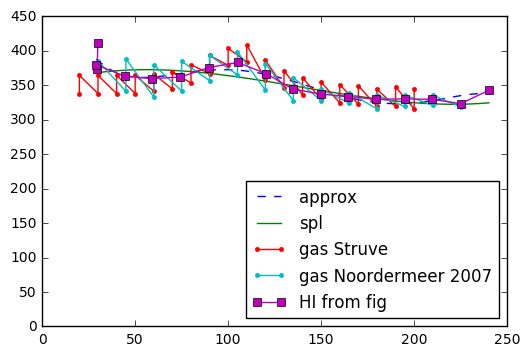

In [31]:
# Данные по кинематике газа Struve, WSRT (не исправлено за наклон)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))
r_wsrt, vel_wsrt, e_vel_wsrt = correct_rotation_curve(r_wsrt, vel_wsrt, e_vel_wsrt,  0.0, v0, incl)

# Данные по кинематике газа Noordermee 2007, WSRT (не исправлено за наклон?)
r_noord, vel_noord, e_vel_noord = zip(*np.loadtxt("v_gas_noord.dat", float))
r_noord, vel_noord, e_vel_noord = correct_rotation_curve(r_noord, vel_noord, e_vel_noord,  0.0, v0, incl)

gas_approx = poly1d(polyfit(r_ma_n, vel_ma_n, deg=5))
test_points = np.linspace(min(r_ma_n), max(r_ma_n), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='approx')

spl_gas = inter.UnivariateSpline(r_noord, vel_noord, k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spl')

plt.plot(r_wsrt, vel_wsrt, '.-', label="gas Struve")
plt.plot(r_noord, vel_noord, '.-', label="gas Noordermeer 2007")
plt.plot(r_ma_n, vel_ma_n, 's-', label='HI from fig')
plt.ylim(0, 450)
plt.legend(loc='lower right');

Оно все конечно согласуется, т.к. это все одно и то же

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

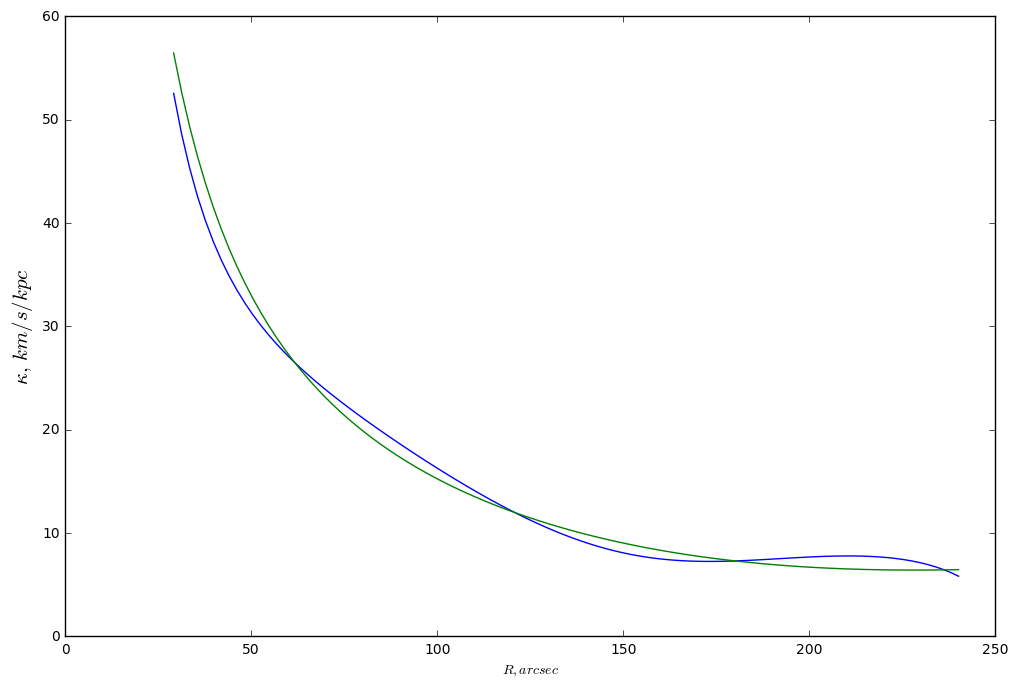

In [32]:
#использовавшееся в дипломе приближение
ef = [104.55995900171898, 54.292488898429013, 34.856981586343409, 25.282657419650114, 19.107329429755854, 13.969314301465111, 
      10.21292602770659, 7.466641224935947, 5.458840202177822, 3.990942574473094, 2.9177667861366507, 2.133171013969345, 
      1.5595552723609254, 1.140186432133711, 0.8335870636080539]

fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-')
# plt.plot(r_g_dens[1:], ef, '--')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15);

### Поверхностная плотность газа

Плотность HI:

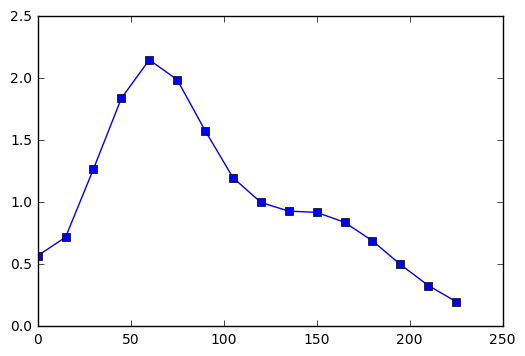

In [33]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-');

В этой работе https://arxiv.org/pdf/astro-ph/0610453v1.pdf (B2 0258+35) есть $\Sigma T_a dv$ = 0.88.

In [34]:
0.88*3.2

2.8160000000000003

Полная масса $H_2$ получается для $R$

In [35]:
2*math.pi * 24.20**2 * (scale * 1000.)**2 * 2.81/1e9

1.0654350627771043

Не уверен, что это то, что нужно. Общая выведенная масса $H_2$ у них в работе - log M_H2 = 8.1, правда постоянаая Хаббла $H_0 = 100$.

In [36]:
np.power(10., 8.1)/1e9

0.12589254117941662

Если изменить постоянную Хаббла:

In [37]:
(100./75.)**2 * np.power(10., 8.1)/1e9

0.22380896209674064

Центральное значение:

In [38]:
0.22*1e9/(2*math.pi*24.20**2 * (scale * 1000.)**2)

0.580232453011856

Мало конечно, но что делать.

Масса атомарного водорода у Ноордермеера $HI$ - $17.09\times10^9 M_{sun}$. Проверим, сколько у нас водорода:

In [39]:
import scipy.integrate as integrate
import scipy.interpolate

tmp_ = scipy.interpolate.interp1d(r_g_dens, gas_dens)

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), r_g_dens[0], r_g_dens[-1])
print (scale * 1000.)**2 * result[0]/1e9

14.7100823358


C:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


В принципе похоже, оть и не должно так отличаться.

Из заметок: 

Для справки: Использованная полная масса COCO для 1167 не согласуется с этой работой https://arxiv.org/pdf/1510.00729.pdf (у нас в 4 раза больше). Причем в этой https://arxiv.org/pdf/1408.7106.pdf работе для 1167 тоже в 4 раза меньше. Плюс там есть заметка:

>NGC 1167 has a very large HI disk (Struve et al. 2010), and a large dust mass. The molecular gas derived from the detected CO emission is however modest. Given the usual exponential radial distribution of CO emission in galaxies (e.g., Young & Scoville 1991), it is not likely that we are missing some CO emission outside of the 7.8kpc beam. The galaxy is currently active, hosting the compact steep spectrum radio source B2 0258+35, and shows signs of previous AGN outbursts in the forms of large-scale (∼10′ / 200 kpc) low surface brightness lobes (Shulevski et al. 2012).

и правда, у нас меньше примерно в 1.5 раза, а эти две оценки согласуются. Не думаю, что это важно конечно.

In [40]:
np.power(10., 8.5)/1e9, 3.3*1e8/1e9

(0.31622776601683794, 0.33)

## Данные по фотометрии

Фотометрий две - в R и в B, которые вроде как согласуются (для максимального диска в R - 4)

* Noordermeer, Hulst 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract
* CALIFA http://adsabs.harvard.edu/abs/2016arXiv161005324M $g$, $r$, $i$
* CALIFA http://www.aanda.org/articles/aa/pdf/2015/09/aa25938-15.pdf оценка на $M_*$ и $\mu_*$ ($M_{\circ}/{pc}^2$)
* ссылка на SDSS http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?id=1237670959481356507

In [41]:
all_photometry = []

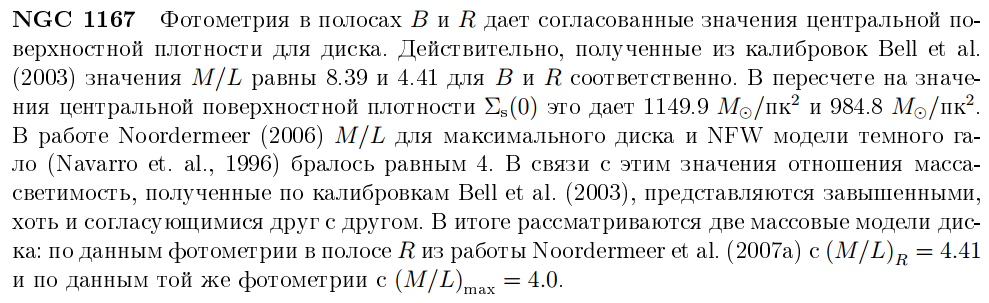

In [42]:
Image('diplom_photom.png')

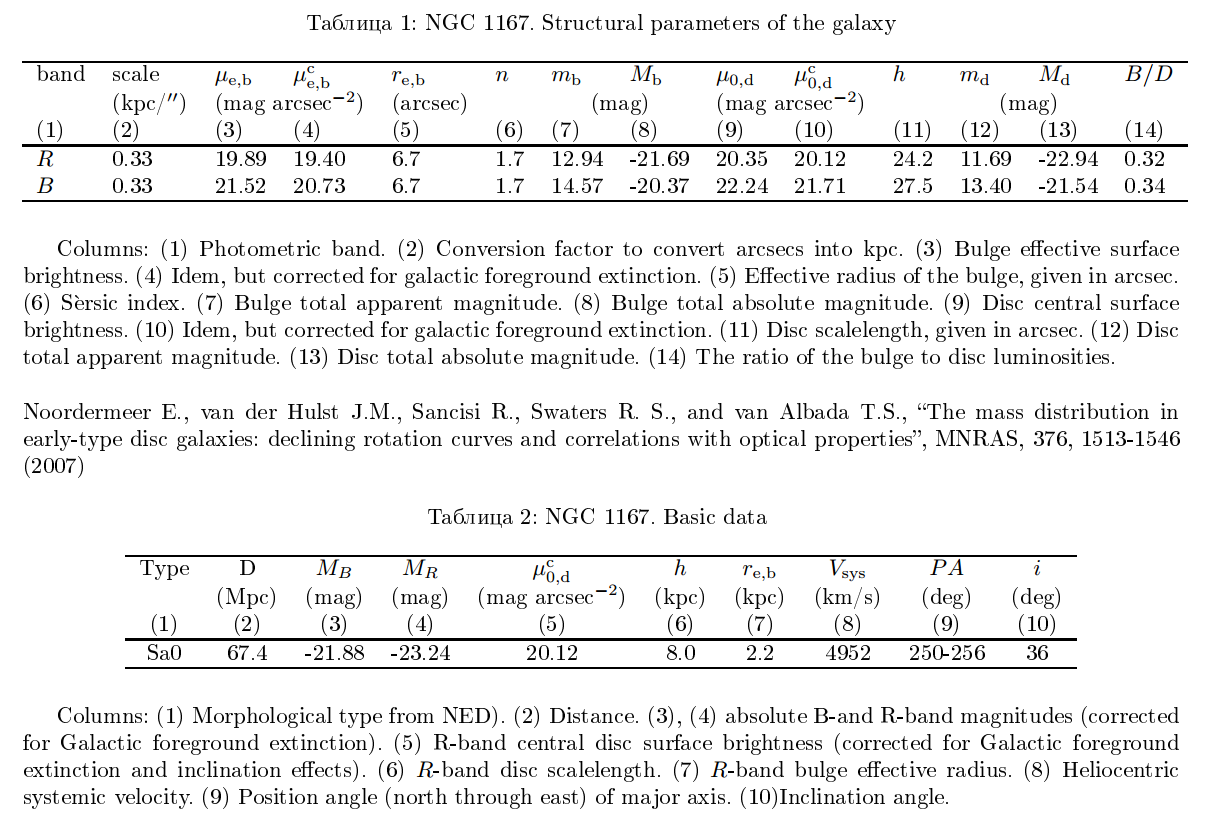

In [43]:
Image('photometry_pdf.png')

In [44]:
M_R = -22.94 #11.69 - это правильно? надо брать абсолютные? в дипломе были относительные, тут разница уже существенная
M_B = -21.54 #13.40

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [45]:
print 'B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'B', 'B-R'), bell_mass_to_light(M_B-M_R, 'R', 'B-R'))

B : 3.80; R: 2.71.


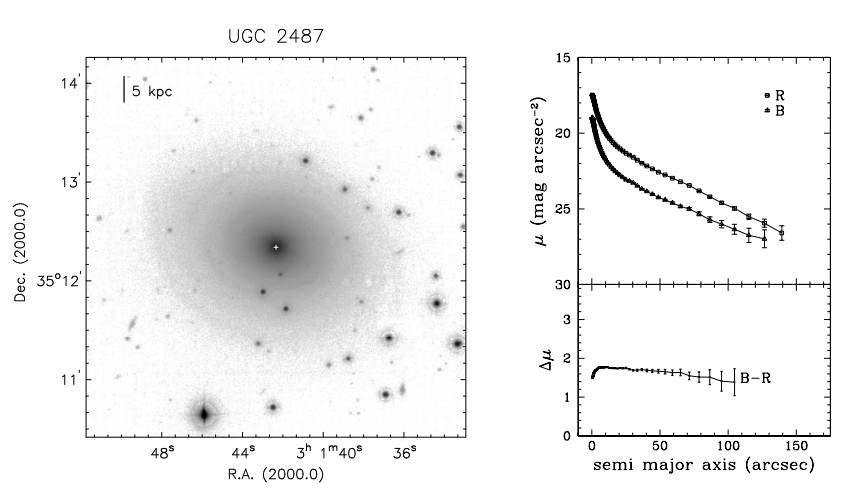

In [46]:
Image('noord_pics/n1167_photom.png')

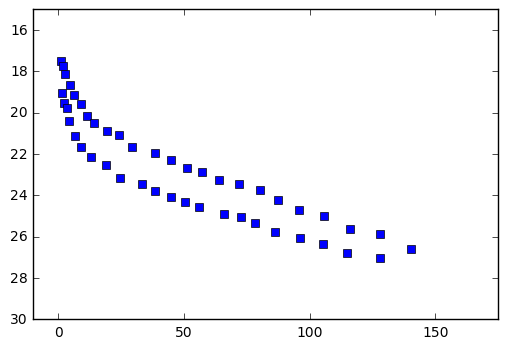

In [47]:
r_phot, mu_phot = zip(*np.loadtxt("n1167_noord_photoRB.dat", float, delimiter=','))
plt.plot(r_phot, mu_phot, 's')
plt.xlim(-10, 175)
plt.ylim(30, 15);

In [48]:
# R-band
r_eff_R = 6.7
mu_eff_R = 19.89 # уточнить это ли число
n_R = 1.7
mu0d_R = 20.35 # и тут тоже
h_disc_R = 24.2

mu_eff_Rc = 19.40 # уточнить это ли число
mu0d_Rc = 20.12 # и тут тоже

In [49]:
# B-band
r_eff_B = 6.7
mu_eff_B = 21.52 # уточнить это ли число
n_B = 1.7
mu0d_B = 22.24 # и тут тоже
h_disc_B = 27.5

mu_eff_Bc = 20.73 # уточнить это ли число
mu0d_Bc = 21.71 # и тут тоже

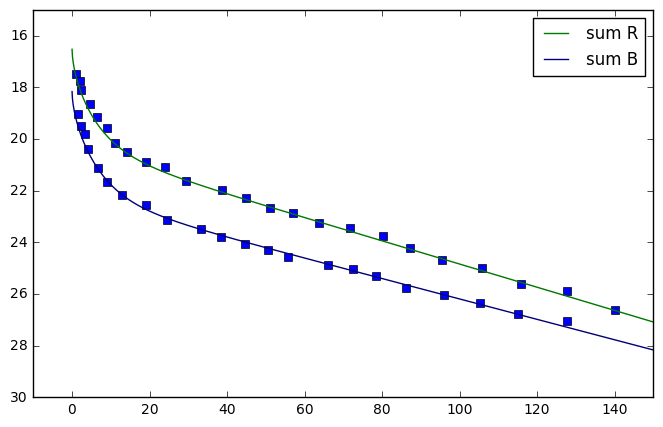

In [50]:
p_ = np.arange(0., 150., 0.1)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend();

Отлично, похоже на правду. Массовые модели:

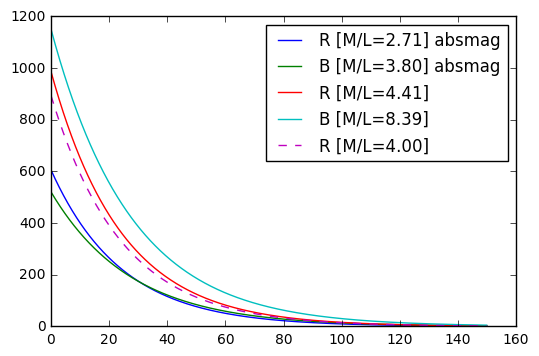

In [51]:
b_r_color = M_B-M_R

M_to_L_Rc = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}] absmag'.format(M_to_L_Rc))

M_to_L_Bc = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}] absmag'.format(M_to_L_Bc))

diploma_color = 13.40 - 11.69

M_to_L_R = bell_mass_to_light(diploma_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(diploma_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

# максимальный диск
surf_R_max = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=4., band='R') for l in p_]
plt.plot(p_, surf_R_max, '--', label='R [M/L={:2.2f}]'.format(4.))

plt.legend();

Так получились схожими и вполне не завышенными, M/L меньше ноордермееровского максимального.

В http://aas.aanda.org/articles/aas/pdf/2000/06/h1643.pdf она обозначена как 0258+35 и есть очень короткая $V$ фотометрия (3 секунды), соответственно диск оттуда не извлечь.

Тут http://adsabs.harvard.edu/cgi-bin/bib_query?2003AJ....125.2307A есть какая-то декомпозиция, но нет данных.

In [52]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_Rc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_Bc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B')))

#максимальный диск
all_photometry.append(('Noorder R_max', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, 4., 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=4., band='R')))

CALIFA $g$, $r$, $i$:

sdss http://skyserver.sdss.org/dr13/en/tools/chart/navi.aspx coords 45.42666667, 35.20583333

http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?id=1237670959481356507

Тут данные не исправлены за поглощение, как написал Сережа, надо взять FOREGROUND GALACTIC EXTINCTION из NED и исправить.

Раньше я брал цвета из SDSS таблицы, но это было неверно и к тому же там было предупреждение что данные не точны.

In [53]:
A_lambda_g = 0.598
A_lambda_r = 0.414
A_lambda_i = 0.307

In [54]:
MUE_g=21.46976
Re_g=7.57209
n_g=2.20557
MU0_g=21.89252-A_lambda_g
hi_g=24.4525

MUE_r=20.7038
Re_r=9.09017
n_r=2.6612
MU0_r=21.0106-A_lambda_r
hi_r=25.8222


MUE_i=20.6073
Re_i=11.4278
n_i=3.20625
MU0_i=20.624-A_lambda_i
hi_i=27.508

TODO: правильно ли исправлено за поглощение

TODO: правильно ли исправлены яркости

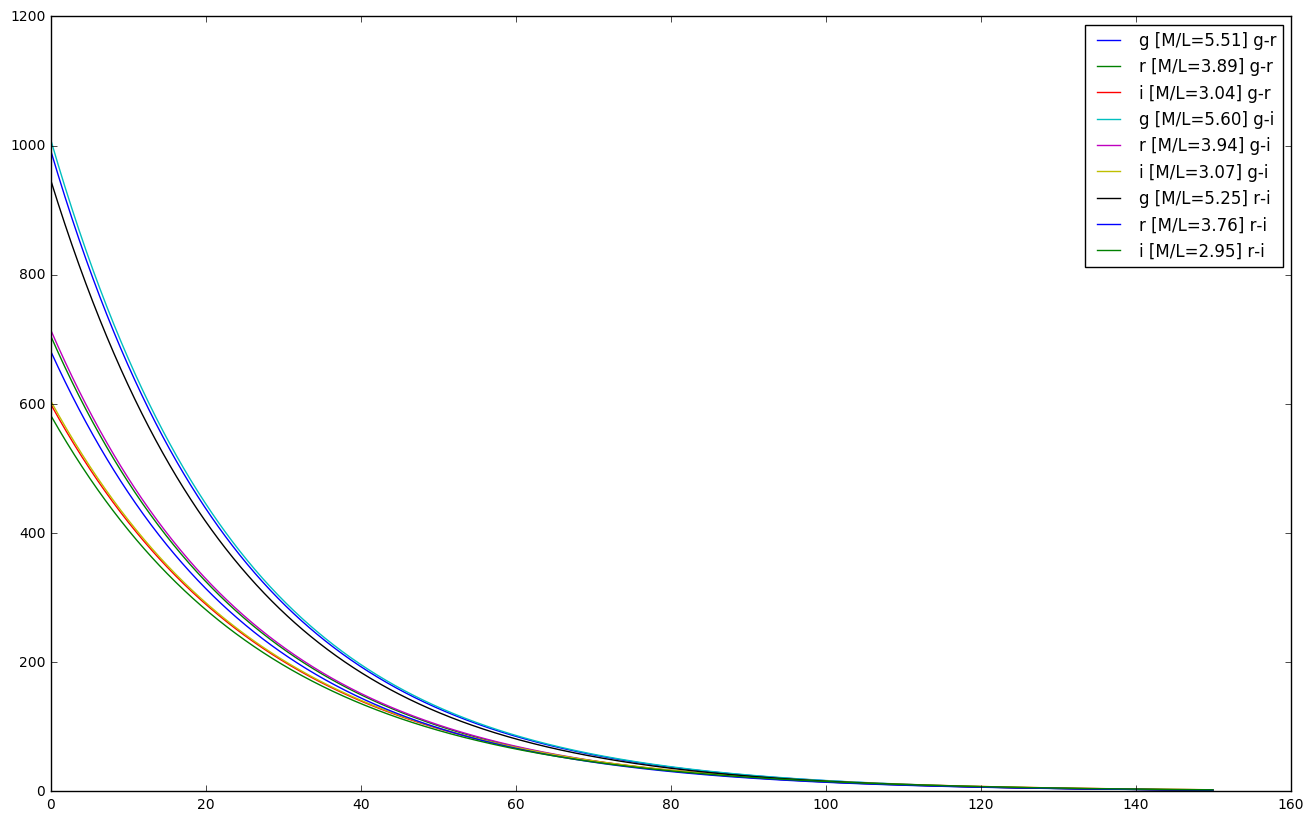

In [55]:
M_g = disc_totmag(MU0_g, hi_g, scale)
M_r = disc_totmag(MU0_r, hi_r, scale)
M_i = disc_totmag(MU0_i, hi_i, scale)

fig = plt.figure(figsize=[16, 10])

sdss_surf = []

for color_desc, color in [('g-r', M_g-M_r), ('g-i', M_g-M_i) , ('r-i', M_r-M_i)]:

    surf_g = [surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=bell_mass_to_light(color, 'g', color_desc), band='g') for l in p_]
    plt.plot(p_, surf_g, '-', label='g [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'g', color_desc), color_desc))
    sdss_surf.append([surf_g[0], bell_mass_to_light(color, 'g', color_desc), 'g', color_desc])

    surf_r = [surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=bell_mass_to_light(color, 'r', color_desc), band='r') for l in p_]
    plt.plot(p_, surf_r, '-', label='r [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'r', color_desc), color_desc))
    sdss_surf.append([surf_r[0], bell_mass_to_light(color, 'r', color_desc), 'r', color_desc])

    surf_i = [surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=bell_mass_to_light(color, 'i', color_desc), band='i') for l in p_]
    plt.plot(p_, surf_i, '-', label='i [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'i', color_desc), color_desc))
    sdss_surf.append([surf_i[0], bell_mass_to_light(color, 'i', color_desc), 'i', color_desc])

plt.legend();

In [56]:
sorted(sdss_surf)

[[581.51153235522474, 2.9543283874174473, 'i', 'r-i'],
 [598.90332964036588, 3.0426861887143533, 'i', 'g-r'],
 [603.80473161710029, 3.0675874162779109, 'i', 'g-i'],
 [680.58878059249344, 3.7551321144337044, 'r', 'r-i'],
 [704.21878564344934, 3.8855100950313668, 'r', 'g-r'],
 [713.51635423752532, 3.936809204580852, 'r', 'g-i'],
 [945.02782535508686, 5.2523424198628579, 'g', 'r-i'],
 [990.84446798666215, 5.506985393511914, 'g', 'g-r'],
 [1007.4771691477172, 5.5994277952288014, 'g', 'g-i']]

Добавим экстремальные представители в таблицу (т.к. более-менее равномерно заполняет плоскость и чтобы были представлены все три модели):

In [57]:
all_photometry.append(('califa g (g-i)', Re_g, MUE_g, n_g, MU0_g, hi_g, 5.59, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=5.59, band='g')))

all_photometry.append(('califa r (g-r)', Re_r, MUE_r, n_r, MU0_r, hi_r, 3.88, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=3.88, band='r'))) #модель из середины

all_photometry.append(('califa i (r-i)', Re_i, MUE_i, n_i, MU0_i, hi_i, 2.95, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=2.95, band='i')))

In [58]:
show_all_photometry_table(all_photometry, scale)

+------+----------------+---------+----------+------+---------+----------+-------+-------------+-----------+
|      | Name           |   r_eff |   mu_eff |    n |   mu0_d |   h_disc |   M/L | M_d/M_sun   |   Sigma_0 |
|------+----------------+---------+----------+------+---------+----------+-------+-------------+-----------|
| 0.00 | Noorder R      |    6.70 |    19.40 | 1.70 |   20.12 |    24.20 |  2.71 | 2.30E+11.   |       605 |
| 1.00 | Noorder B      |    6.70 |    20.73 | 1.70 |   21.71 |    27.50 |  3.80 | 2.55E+11.   |       520 |
| 2.00 | Noorder R_max  |    6.70 |    19.40 | 1.70 |   20.12 |    24.20 |  4.00 | 3.39E+11.   |       893 |
| 3.00 | califa g (g-i) |    7.57 |    21.47 | 2.21 |   21.29 |    24.45 |  5.59 | 3.89E+11.   |      1006 |
| 4.00 | califa r (g-r) |    9.09 |    20.70 | 2.66 |   20.60 |    25.82 |  3.88 | 3.04E+11.   |       703 |
| 5.00 | califa i (r-i) |   11.43 |    20.61 | 3.21 |   20.32 |    27.51 |  2.95 | 2.85E+11.   |       581 |
+------+-----------

### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

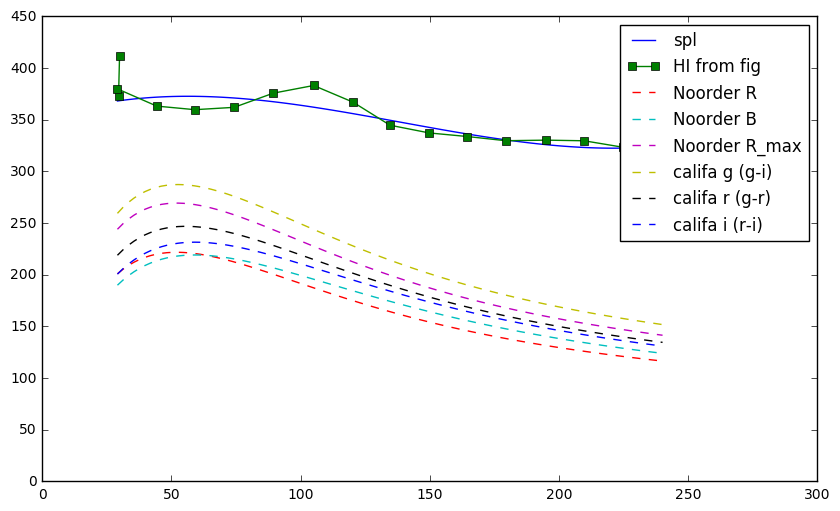

In [59]:
fig = plt.figure(figsize=[10,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spl')
plt.plot(r_ma_n, vel_ma_n, 's-', label='HI from fig')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), '--', label=photom[0])


plt.ylim(0, 450)
plt.xlim(0, 300)
plt.legend(loc='best');

Все более-менее одинаковое.

## Зоны звездообразования

*Spiral-like star-forming patterns in CALIFA early-type galaxies* http://adsabs.harvard.edu/cgi-bin/bib_query?2016A%26A...585A..92G $H_{\alpha}$ (нижняя картинка) и SDSS + слабый SFR (верхняя), все это соответствует SFR 0.1-0.3 $M_{o}$ в год:

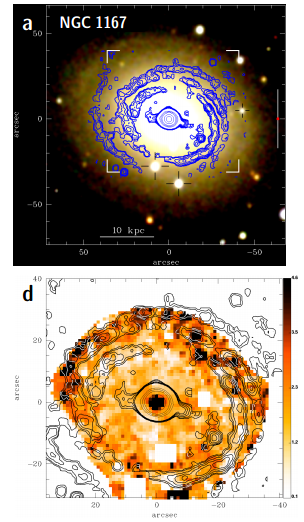

In [60]:
Image('califa_2016_halpha_plus_sfr.png')

(0, 200)

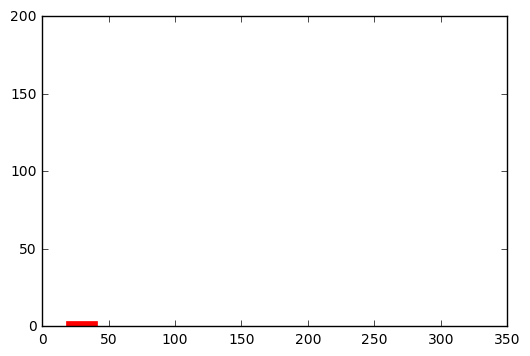

In [61]:
# TODO: разобраться и сделать обоснованно 
def plot_SF(ax):
#     ax.plot([55., 65.], [0., 0.], '-', lw=7., color='red')
    ax.plot([22., 38.], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

## Неустойчивость

In [62]:
# from instabilities import *

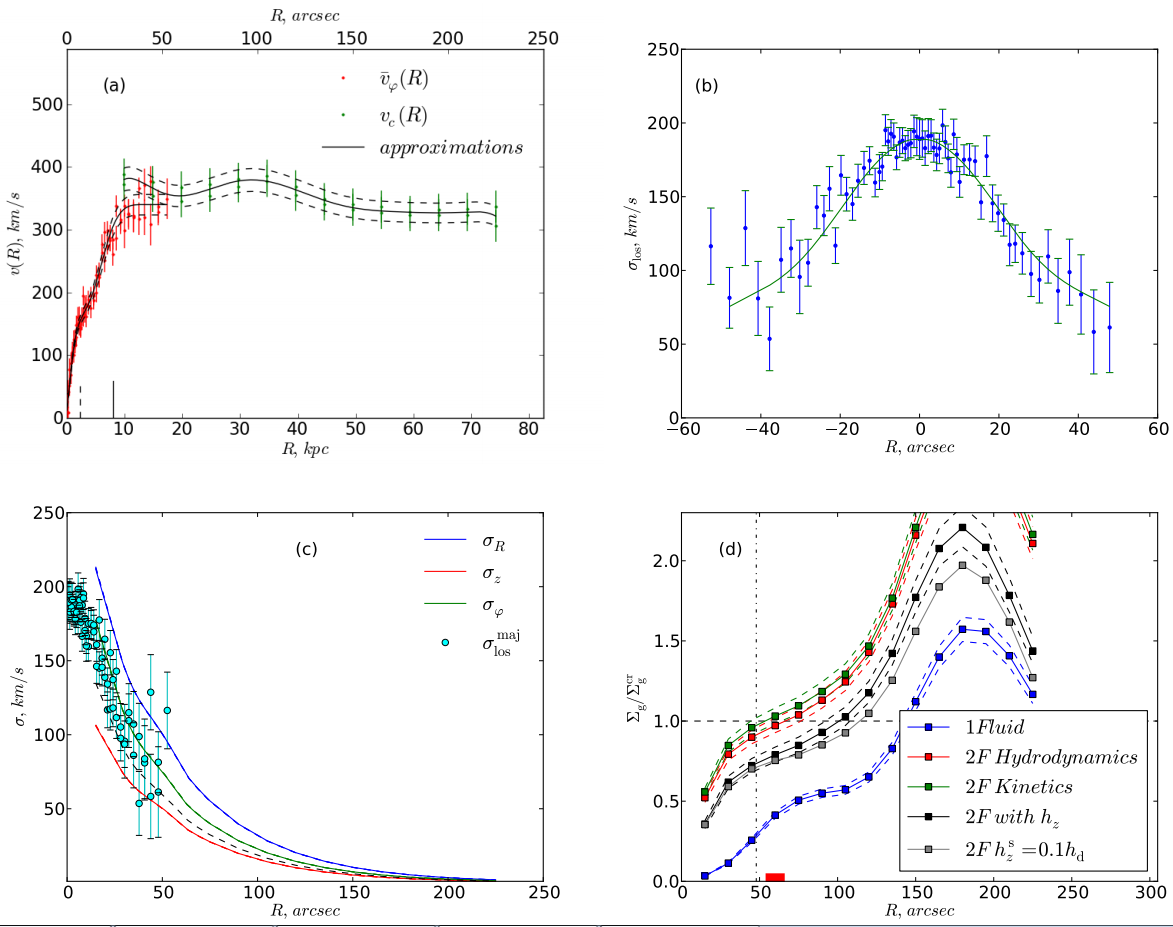

In [63]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [64]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(max(r_sig_ma), max(r_sig_mi)) #где заканчиваются данные

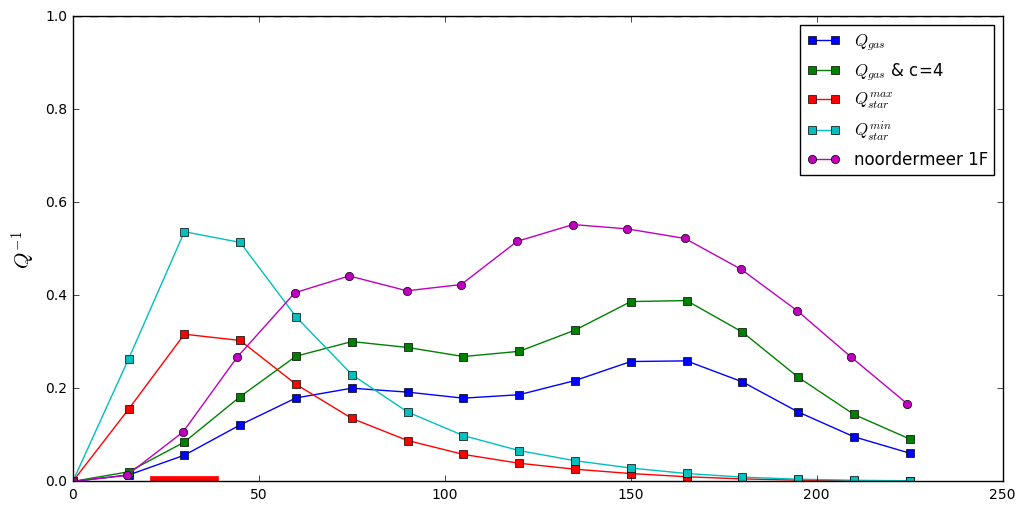

In [65]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        [sig_R_maj_max(_) for _ in r_g_dens], 
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        [sig_R_maj_min(_) for _ in r_g_dens], 
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.plot(map(lambda l: l/scale, r_q_n), q_n, 'o-', label='noordermeer 1F')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15);

У Noordermeer значения больше, потому что похоже он использовал значение скорости звука меньше $c=4\, km/s$


**НЕ ИСПРАВЛЕНО ЗА 1.6!** Т.к. тут еще сравнение с звездным Q. И дальше тоже не будет исправлено, поскольку эту константу трудно определить.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

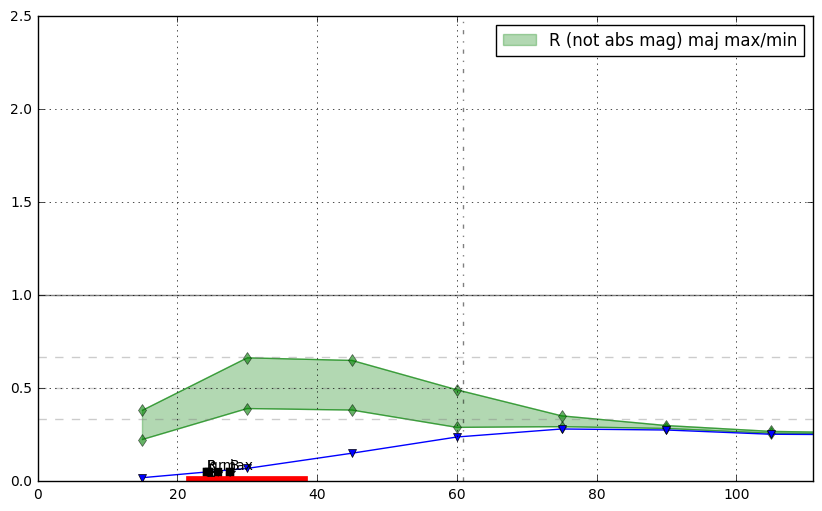

In [66]:
total_gas_data = zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]


fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R (not abs mag) maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Сравним влияние наклона и как выглядит максимальный диск.

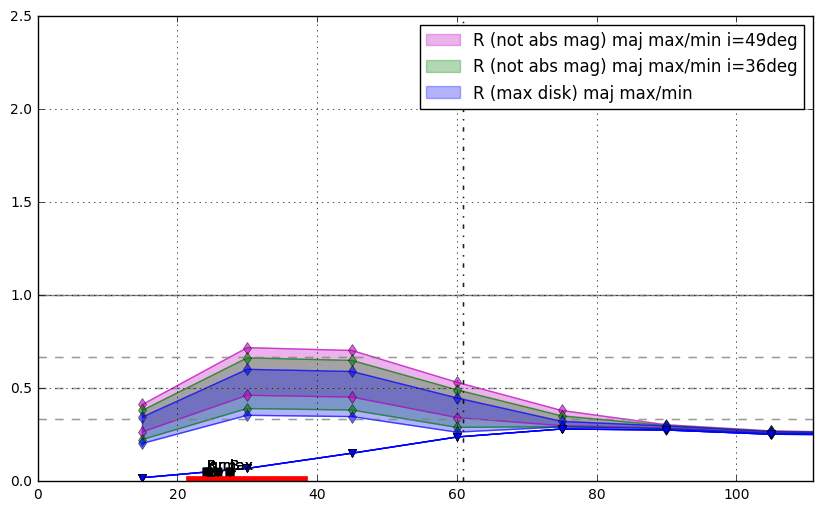

In [67]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

incl = 49.0
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='R (not abs mag) maj max/min i=49deg')

incl = 36.0
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R (not abs mag) maj max/min i=36deg')

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 4., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 4., 'R'), 
              data_lim=data_lim, color='b', alpha=0.3, disk_scales=disk_scales, label='R (max disk) maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

# Конец

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


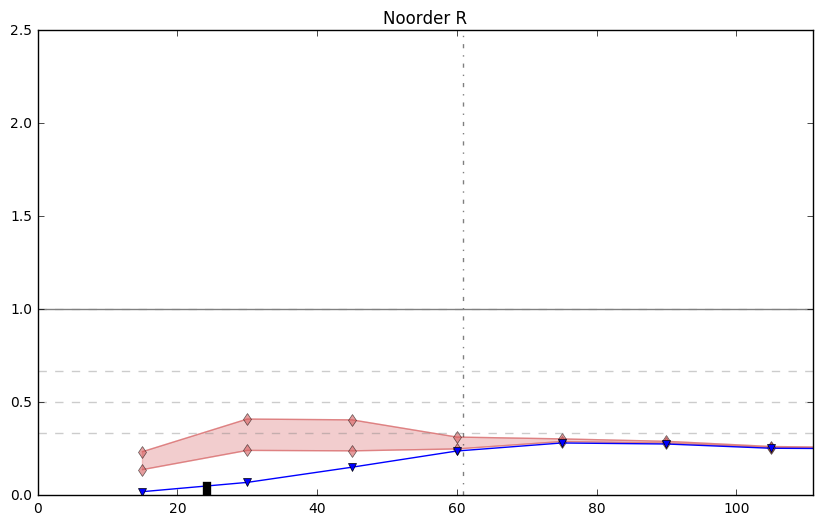

In [68]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [69]:
# anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [70]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

Noorder R      : M/L was 2.71 and for max it equal 5.53, for submax equal 2.76
Noorder B      : M/L was 3.80 and for max it equal 7.93, for submax equal 3.95
Noorder R_max  : M/L was 4.00 and for max it equal 5.53, for submax equal 2.76
califa g (g-i) : M/L was 5.59 and for max it equal 6.80, for submax equal 3.39
califa r (g-r) : M/L was 3.88 and for max it equal 6.39, for submax equal 3.18
califa i (r-i) : M/L was 2.95 and for max it equal 5.52, for submax equal 2.75


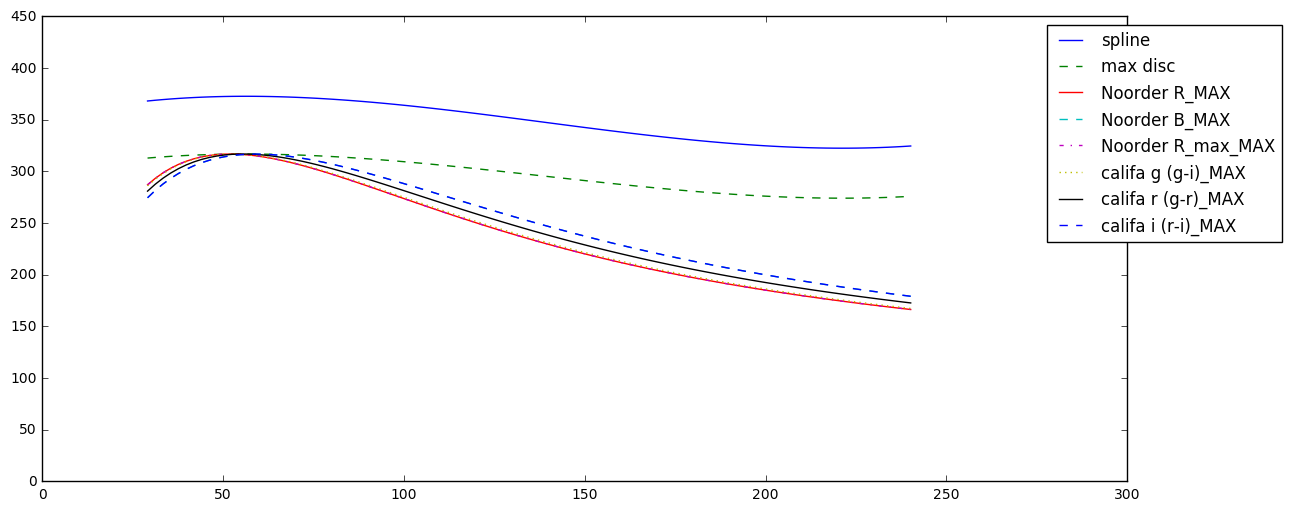

In [71]:
fig = plt.figure(figsize=[14,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
# plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
# plt.plot(r, vel, '.', label = 'Noord thesis')

max_coeffs = {}

for photom in all_photometry:
    disc_max = 2.2*photom[5]
    max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    
    plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 450)
plt.xlim(0, 300)
plt.legend(bbox_to_anchor=(1.15, 1.0));

Опять же, ничего сильно не выделяется.

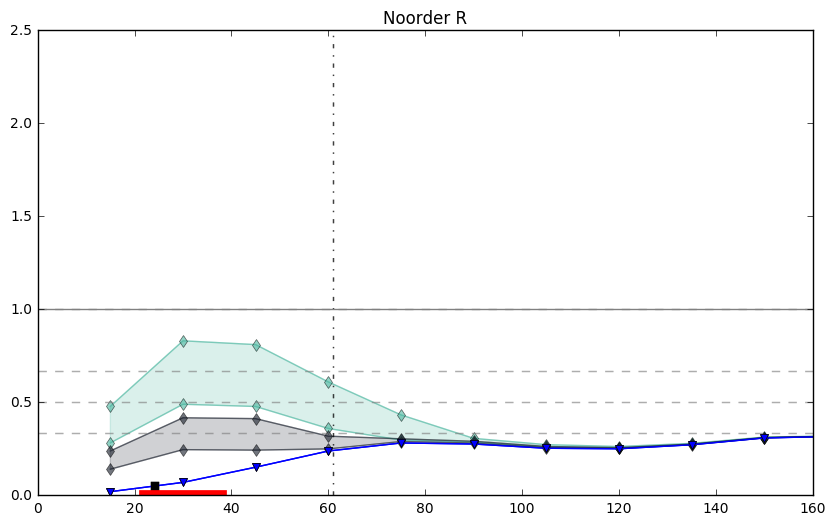

In [72]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:],
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:], 
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    ax.set_xlim(0., 160.)
    plot_SF(ax)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [73]:
# anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [74]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

Есть очень неплохие модели.

### Оценки с молекулярным диском

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


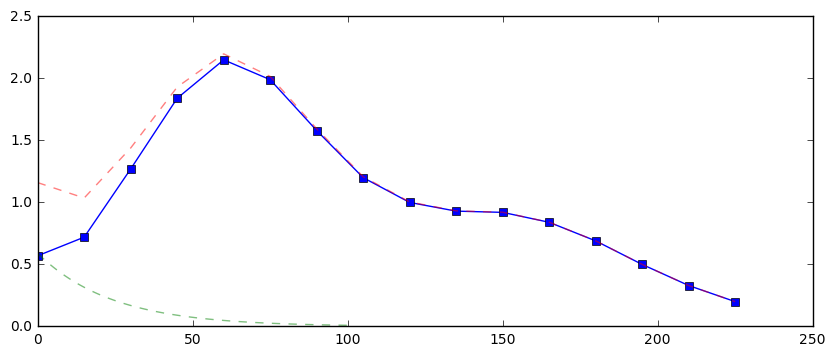

In [75]:
fig = plt.figure(figsize=[10, 4])

# def y_interp_(r, h):
#     return 2.8*np.exp(-r/h)

def y_interp_(r, h):
    return 0.22*1e9/(2*math.pi*h**2 * (scale * 1000.)**2) * np.exp(-r/h)

points = np.linspace(0.1, 100., 100.)

plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(points, y_interp_(points, 24.),  '--', alpha=0.5)
plt.plot(r_g_dens, map(lambda l: y_interp_(l[0], 24.) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5);

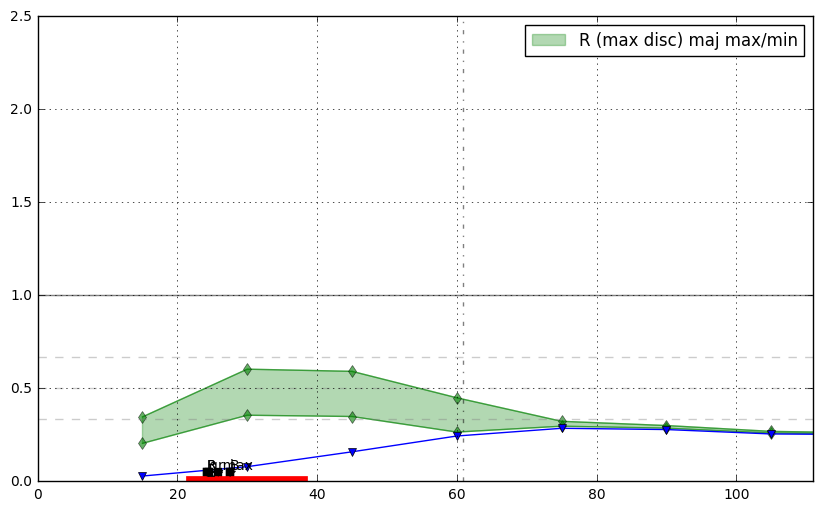

In [76]:
fig = plt.figure(figsize=[10, 6])

total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 4., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 4., 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R (max disc) maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Остальные фотометрии: 

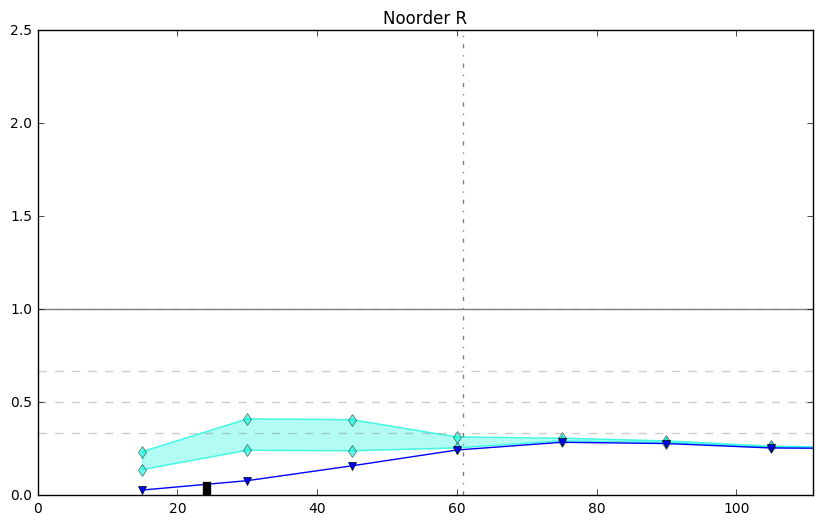

In [77]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [78]:
# anim.save('..\\..\pics\\'+name+'_molec.gif', writer='imagemagick', fps=1)

In [79]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

И оценки с максимальным диском:

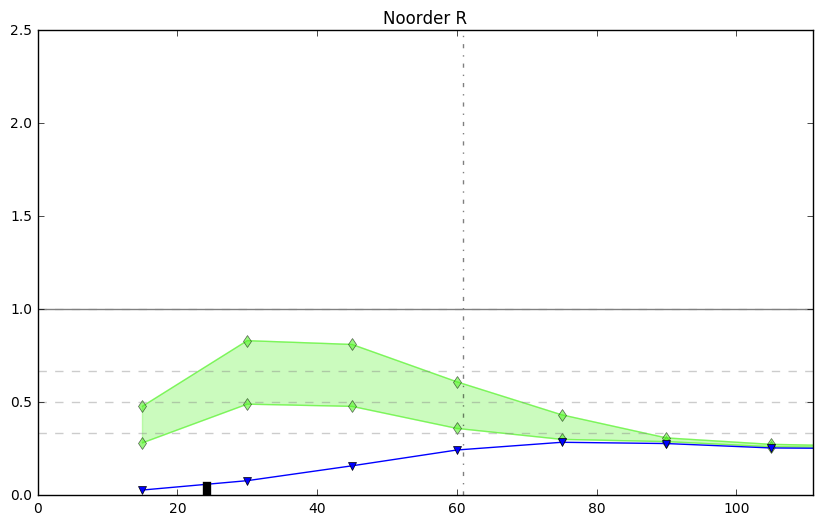

In [80]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [81]:
# anim.save('..\\..\pics\\'+name+'_molec_MAX.gif', writer='imagemagick', fps=1)

In [82]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Картинка 

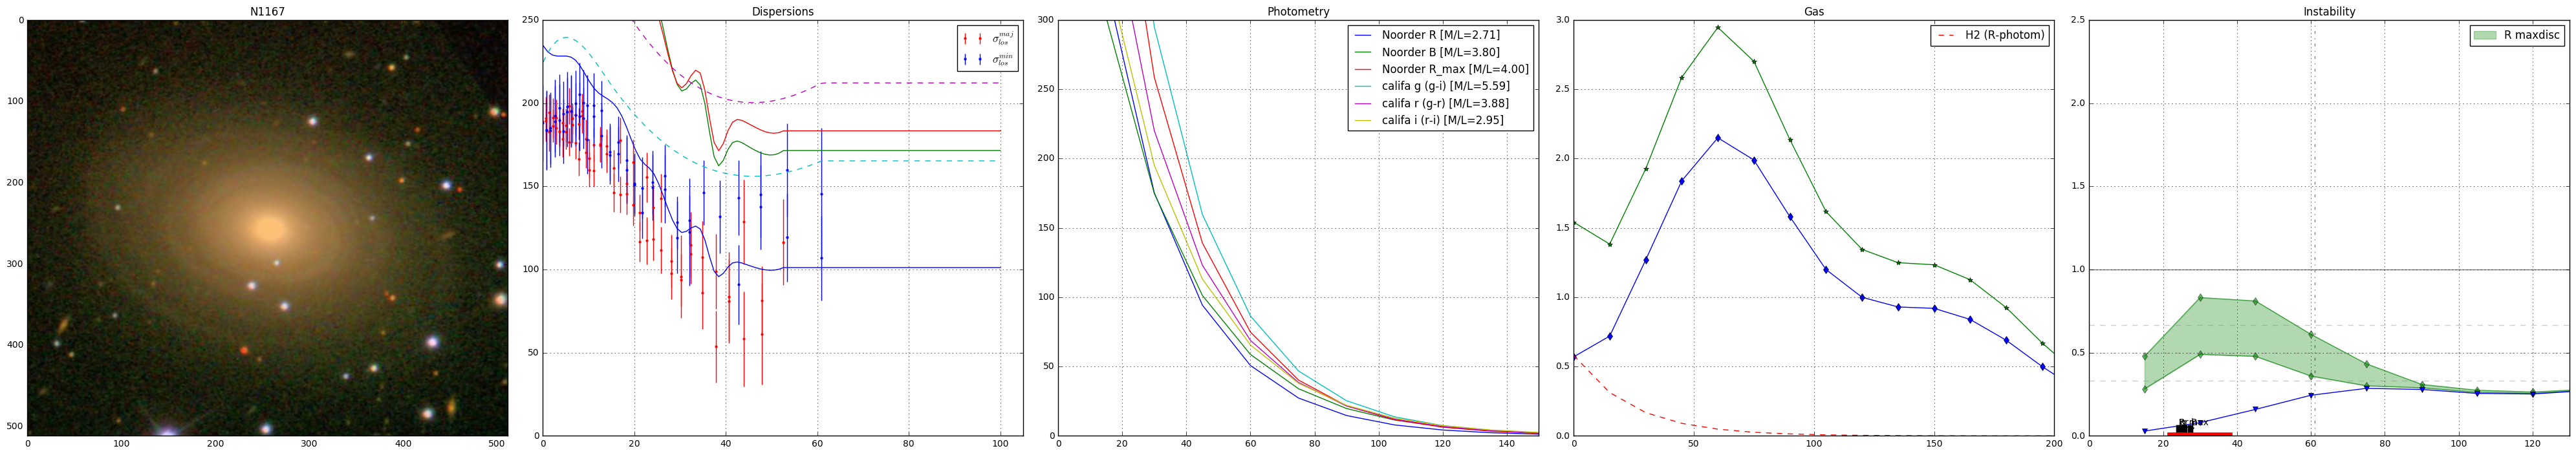

In [83]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('ngc1167_SDSS.jpeg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
    axes[3].plot(r_g_dens, [y_interp_(l, h_disc_R) for l in r_g_dens], '--', label='H2 (R-photom)')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight');
    
save_model_plot(summary_imgs_path)

### Другие механизмы

Schaye (2004), 'cold gas phase':
$$\Sigma_g > 6.1 f_g^{0.3} Z^{-0.3} I^{0.23}$$
или при constant metallicity of 0.1 $Z_{sun}$ and interstellar flux of ionizing photons 10^6 cm−2 s−1:
$$\Sigma_g > 6.1 \frac{\Sigma_g}{\Sigma_g + \Sigma_s}$$

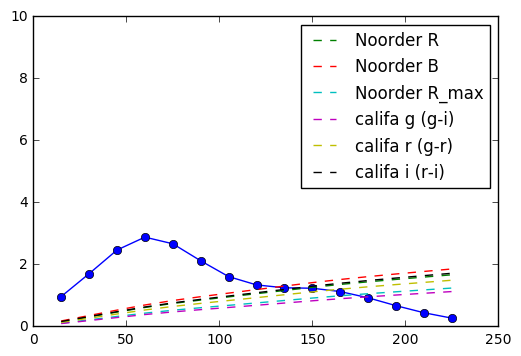

In [78]:
plt.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')

for photom in all_photometry:
    dens_s04 = [Sigma_crit_S04(l[0], l[1], photom[7]) for l in total_gas_data]
    plt.plot(zip(*total_gas_data)[0], dens_s04, '--', label=photom[0])

plt.legend()
plt.ylim(0, 10.);

Видимо неустойчиво вплоть до 100 секунд.

Hunter et al (1998), 'competition with shear' according to Leroy: 
$$\Sigma_A = \alpha_A\frac{\sigma_g A}{\pi G}$$

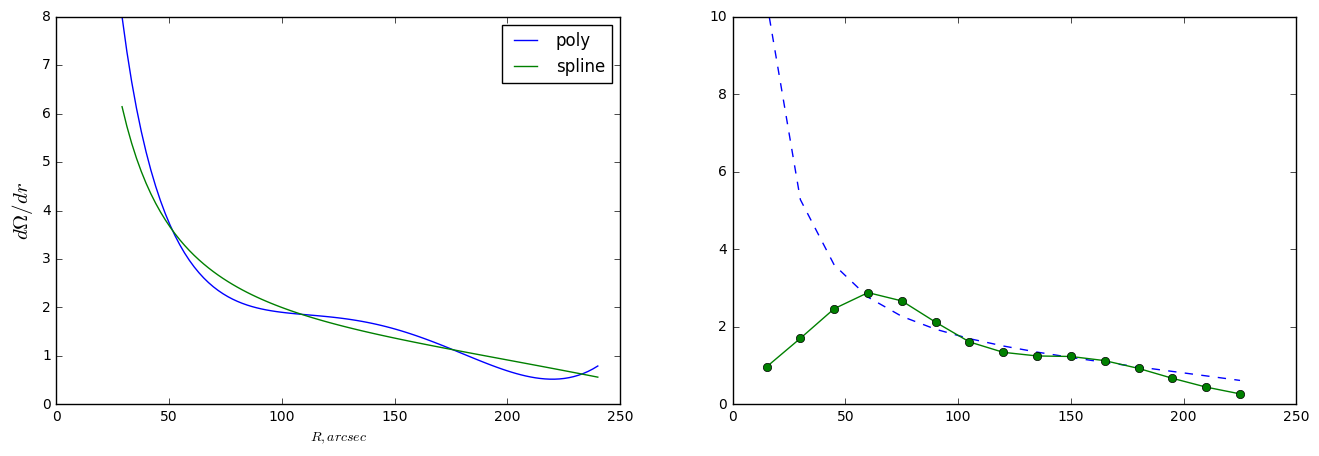

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16, 5])
ax1.plot(test_points, [oort_a(x, gas_approx) for x in test_points], '-', label='poly')
ax1.plot(test_points, [oort_a(x, spl_gas) for x in test_points], '-', label='spline')
ax1.set_xlabel('$R, arcsec$')
ax1.set_ylabel('$d\Omega/dr$', fontsize=15)
ax1.legend()

dens_A = [Sigma_crit_A(l, spl_gas, 2., 6.) for l in zip(*total_gas_data)[0]]
ax2.plot(zip(*total_gas_data)[0], dens_A, '--')
ax2.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')
ax2.set_ylim(0, 10.);

Похоже неустойчиво на промежутке 50-100.

### Дисперсии из АD

Интересный вариант для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.
Вычисление $\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}$ из кинематического масштаба равно $-\frac{2R}{h_{kin}}$

In [80]:
def sigR2Evaluation(R, h, h_kin, p_star, p_gas):
    '''Вычисление sigmaR^2 в случае, если уже известен кинетический масштаб.'''
    return (p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin )

def asymmetricDriftEvaluation(r_pc, h, path, p_star, p_gas, upperLimit):
    '''Вычисление ассиметричного сдвига на основе формулы (21) из методички. Логарифмическая производная от радиальной
     дисперсии скоростей считается как предложено в статье Silchenko et al. 2011, экспонентой фитируется для R > 1h.
     Сами значения считаются только для тех точек, есть данные и по газу и по звездам.'''
    eps = 0.1
    h_kin = 0
    h_kin_next = h
    sigR2 = []
    upper = upperLimit
    r_gt_1h = filter(lambda x: x > h and x <= upper, r_pc)
    expfit = poly1d(1)

    h_disc = h

    print '#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = ' + str(eps) + ' starts.'
    while(abs(h_kin - h_kin_next) > eps):
        h_kin = h_kin_next
        sigR2[:] = []
        for R in r_gt_1h:
            sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))
        sigR2 = map(math.log, sigR2)
        expfit = poly1d(polyfit(r_gt_1h, sigR2, deg=1))
        h_kin_next = (-1 / expfit.coeffs[0])
        print '#!!!!!!!!!!!!# Next approx h_kin =', h_kin_next

    h_kin = h_kin_next
    sigR2[:] = []
    for R in r_pc:
        sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))

    sigR20 = math.exp(expfit.coeffs[1])
#     rexp_sigR2 = evalStartExp(r_pc, sigR2, lambda x: sigR20 * math.exp(-x / h_kin))
    return sigR20, h_kin, [sigR2Evaluation(R, h, h_kin, p_star, p_gas) for R in r_pc]

sigR20, h_kin, sigR2 = asymmetricDriftEvaluation(r_sig_ma, 25., '', star_approx, spl_gas, sig_maj_lim)

#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = 0.1 starts.
#!!!!!!!!!!!!# Next approx h_kin = 13.7801702598
#!!!!!!!!!!!!# Next approx h_kin = 13.8967735938
#!!!!!!!!!!!!# Next approx h_kin = 13.8952652985


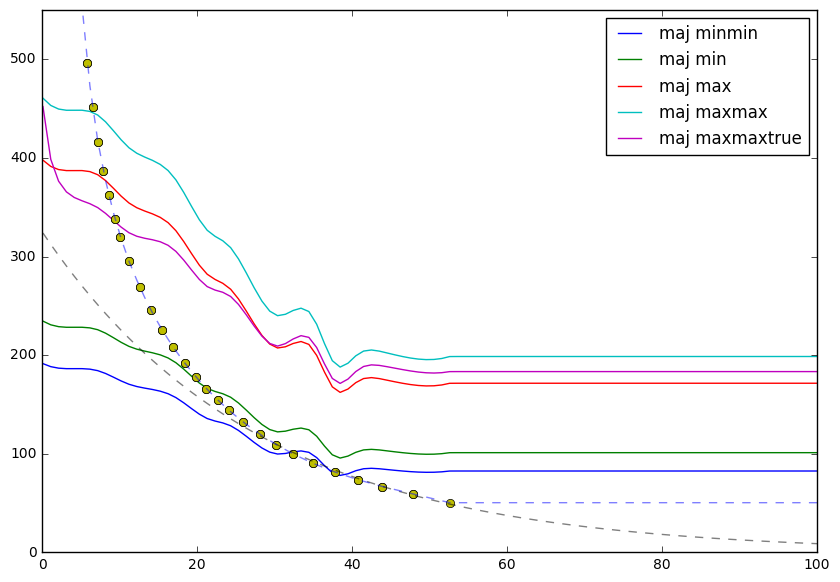

In [81]:
import scipy.interpolate
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(r_sig_ma, np.sqrt(sigR2), 'o')
plt.plot(points, map(lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), points),  '--', alpha=0.5)

y_interp = scipy.interpolate.interp1d(r_sig_ma, np.sqrt(sigR2))

@flat_end(sig_maj_lim)
def ad_interp_(r):
    return y_interp(r)

plt.plot(points[2:], map(ad_interp_, points[2:]),  '--', alpha=0.5)

plt.legend()
plt.ylim(0,550)
plt.xlim(0,100);

Слишком маленький экспоненциальный масштаб.

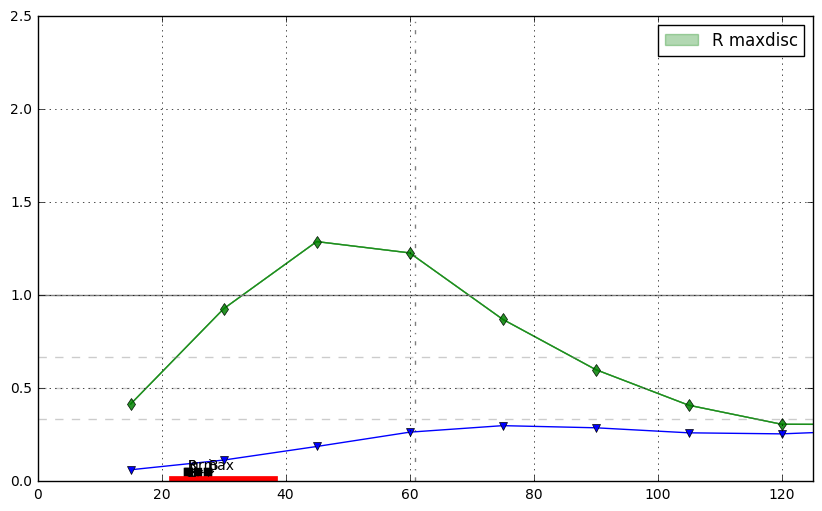

In [82]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:],
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=ad_interp_, 
              sigma_min=ad_interp_, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.xlim(0., 125);

Если брать экспонентой:

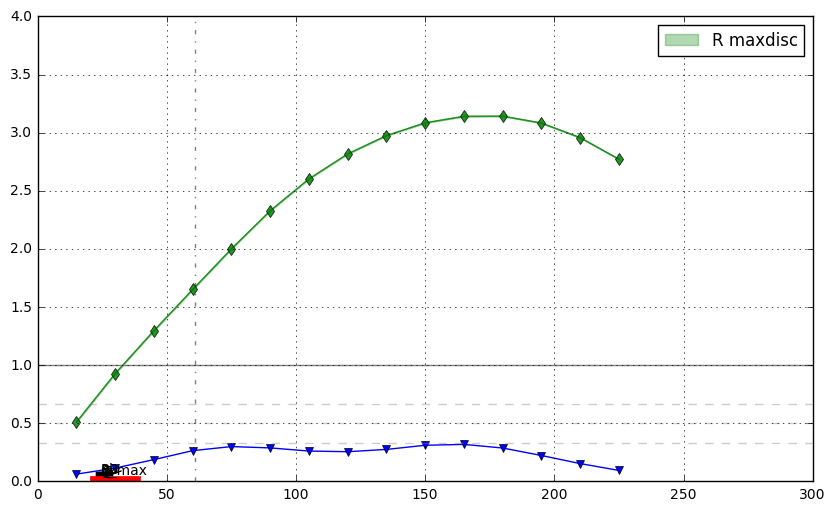

In [83]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:],
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
              sigma_min=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)),
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc')

plt.xlim(0., 300.)
plt.ylim(0., 4.)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Еще раз видно, что масштаб получился неадекватно маленьким.

### Экспоненциальные оценки H2

В работах van der Hulst (2016) и Bigiel, Blitz (2012) есть экспоненциальные соотношения для H2+HI (см. заметки). 

Можно попробовать использовать это для оценки молекулярной компоненты газа:

In [84]:
r25 = h_disc_B*(25. - mu0d_B)/1.0857
r25, h_disc_B, (25. - mu0d_B)/1.0857

(69.9088145896657, 27.5, 2.5421387123514796)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


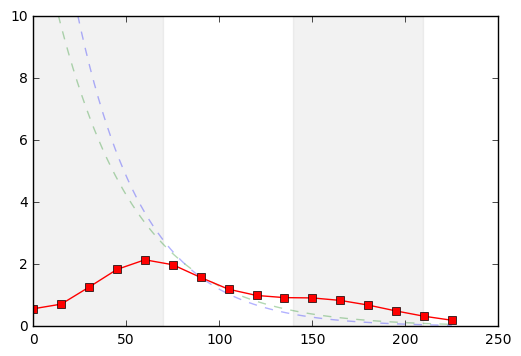

In [85]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

popt, pcov = curve_fit(func1, r_g_dens[5:], gas_dens[5:])
points_ = np.linspace(1., max(r_g_dens), 100.)
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

popt, pcov = curve_fit(func2, r_g_dens[5:], gas_dens[5:])
plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.ylim(0., 10.);

0.692700200565


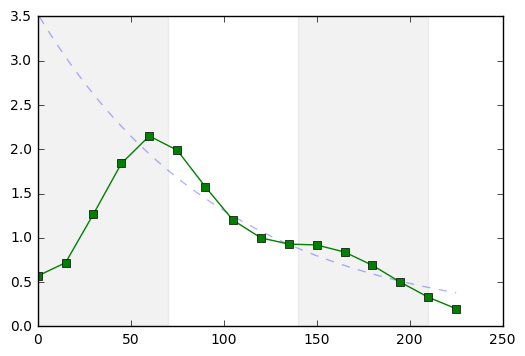

In [86]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

popt, pcov = curve_fit(func, r_g_dens[7:], gas_dens[7:])
print popt[1]
plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-');

0.647553093587
0.777361351532
0.799824350321
0.739137487036
0.692700200565
0.737157301857
0.887771607954
1.1494412203


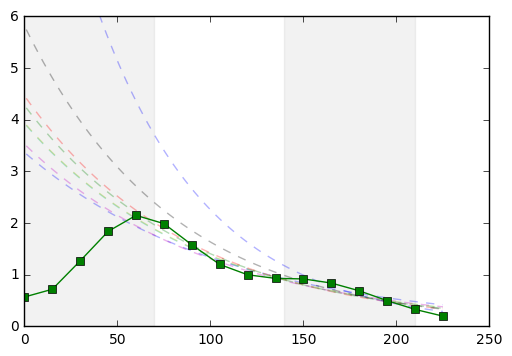

In [87]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

for i in range(3, len(r_g_dens)-5):
    popt, pcov = curve_fit(func, r_g_dens[i:], gas_dens[i:])
    print popt[1]
    plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.ylim(0, 6.);

### Сравнение с Romeo Falstad 2013

Тут учитывается толщина диска:

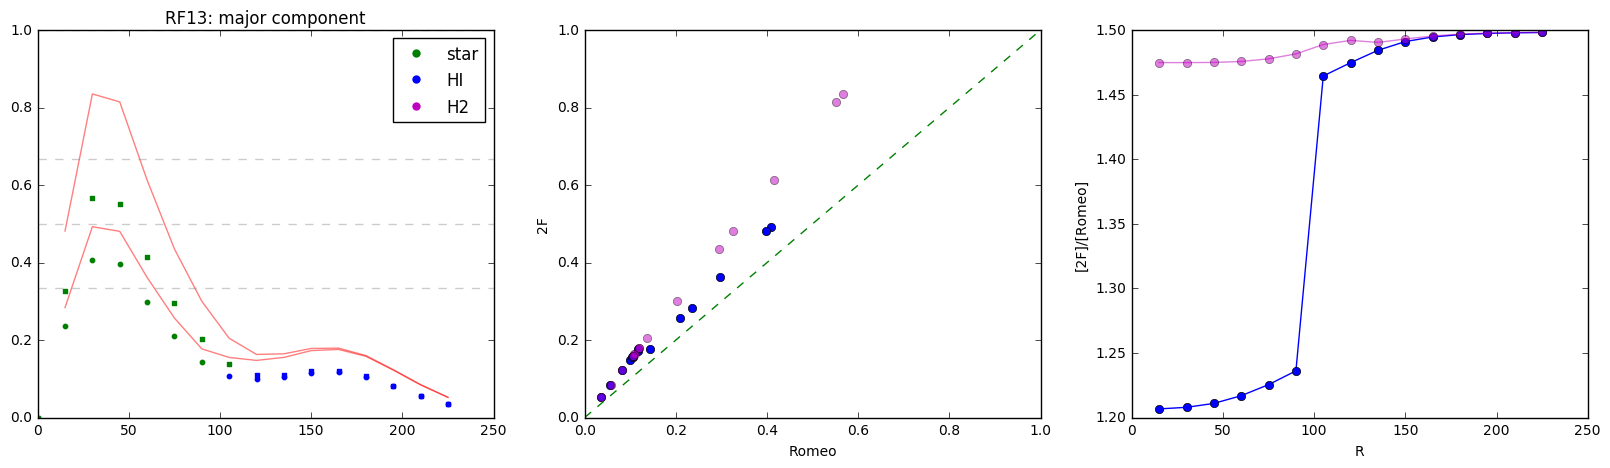

In [88]:
plot_RF13_vs_2F(r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_R) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=11., sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=False)

А тут нет:

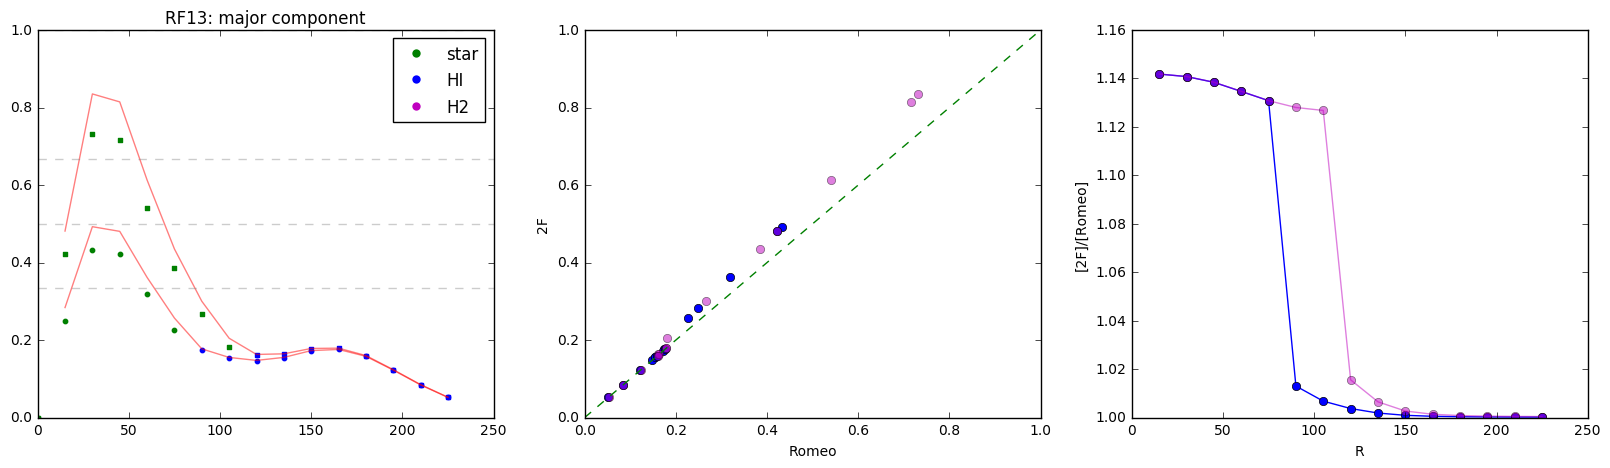

In [89]:
plot_RF13_vs_2F(r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_R) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=11., sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True)
plt.savefig('..\\..\pics\\RF13\\'+name+'.png', format='png', bbox_inches='tight');

Видно, что согласие достаточно хорошее.

### Влияние параметров на результат

Влияние скорости звука:

Wall time: 6min 3s


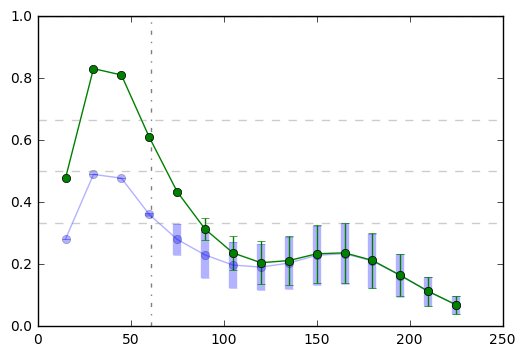

In [86]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 20,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=list(np.linspace(4., 15., 20)), 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'))

plt.savefig('..\\..\pics\\cg\\'+name+'.png', format='png', bbox_inches='tight');

Влияние убирания молек. газа:

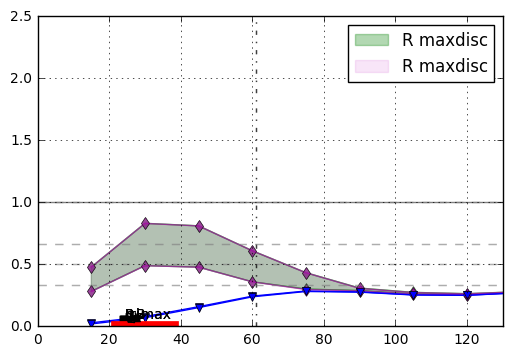

In [87]:
ax = plt.gca()
plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(0. + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color='m', alpha=0.1, disk_scales=disk_scales, label='R maxdisc')

ax.set_ylim(0., 2.5)
ax.set_xlim(0., 130.)
ax.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
ax.grid()

plt.savefig('..\\..\pics\\He\\'+name+'.png', format='png', bbox_inches='tight');

Влияние изменения M/L:

Wall time: 2min 50s


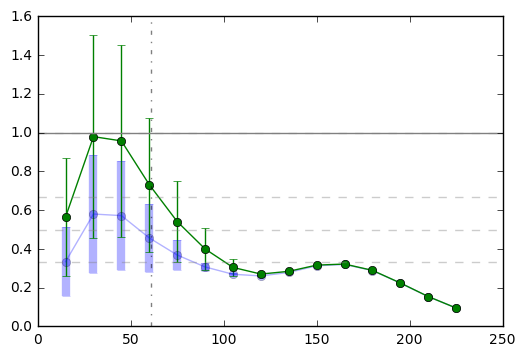

In [91]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 10,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=map(lambda c: lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), c, 'R'), np.linspace(1., 12., 10)), 
                  star_density_min=map(lambda c: lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), c, 'R'), np.linspace(1., 12., 10)));

Влияние масштаба распределения молекулярного газа (т.е. по сути, какая скорость убывания от $h$):

Wall time: 1min 25s


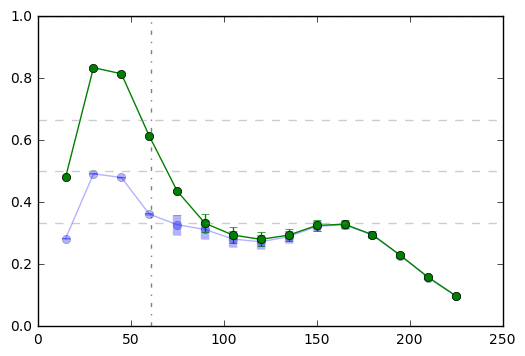

In [92]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 5,
                  total_gas_data=[zip(r_g_dens, [He_coeff*(y_interp_(l[0], c*h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:] for c in 
                                  [0.25, 0.5, 1., 1.5, 2., 3.]], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'));

Влияние величины молекулярного газа:

Wall time: 1min 57s


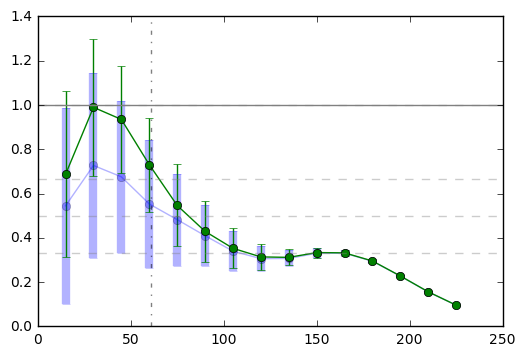

In [93]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 7,
                  total_gas_data=[zip(r_g_dens, [He_coeff*(c*y_interp_(l[0], h_disc_R)/y_interp_(0., h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:] 
                                  for c in [1., 5., 10., 16.5, 20., 50., 100.]], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'));

Замена spl_gas на gas_approx:

Wall time: 33.4 s


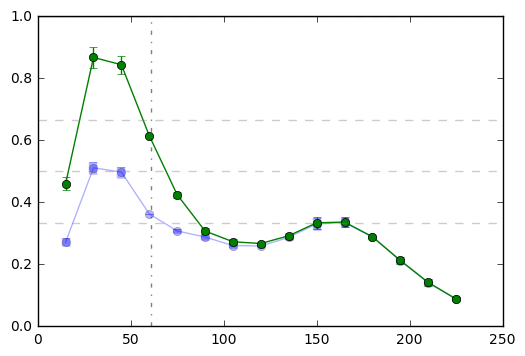

In [94]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 2,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=[spl_gas, gas_approx], 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max,
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'));

### Влияние наклона на результат

Необходимо узнать, как влияет разброс у гле наклона на итоговый результат. К сожалению кроме как вручную это сложно сделать.

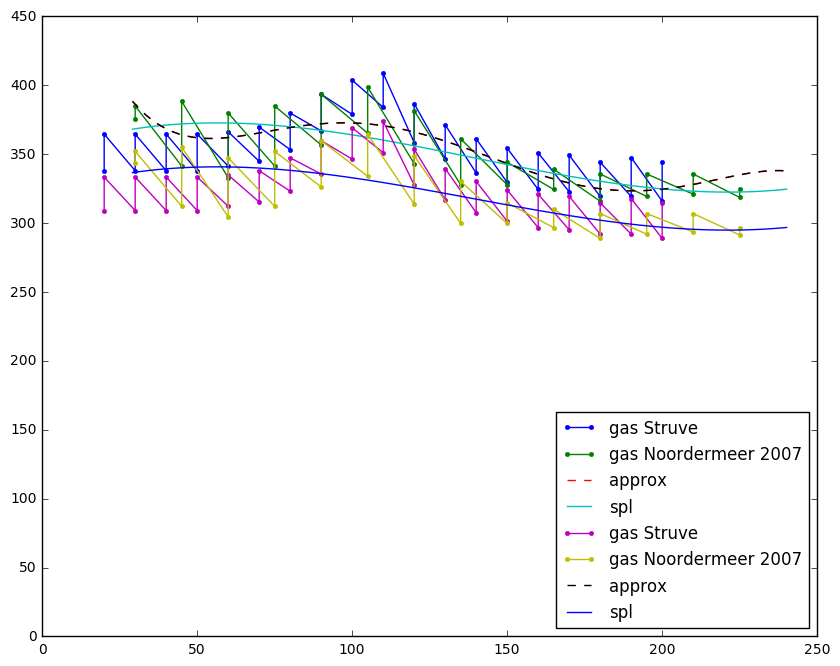

In [88]:
fig = plt.figure(figsize=[10,8])

gas_approxes = []
spl_gases = []

for i in [36., 40.]:
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    # Данные по кинематике газа Struve, WSRT (не исправлено за наклон)
    r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))
    r_wsrt, vel_wsrt, e_vel_wsrt = correct_rotation_curve(r_wsrt, vel_wsrt, e_vel_wsrt,  0.0, v0, incl)

    # Данные по кинематике газа Noordermee 2007, WSRT (не исправлено за наклон?)
    r_noord, vel_noord, e_vel_noord = zip(*np.loadtxt("v_gas_noord.dat", float))
    r_noord, vel_noord, e_vel_noord = correct_rotation_curve(r_noord, vel_noord, e_vel_noord,  0.0, v0, incl)
    
    plt.plot(r_wsrt, vel_wsrt, '.-', label="gas Struve")
    plt.plot(r_noord, vel_noord, '.-', label="gas Noordermeer 2007")

    gas_approx = poly1d(polyfit(r_ma_n, vel_ma_n, deg=5))
    test_points = np.linspace(min(r_ma_n), max(r_ma_n), 100)
    plt.plot(test_points, gas_approx(test_points), '--', label='approx')
    gas_approxes.append(gas_approx)

    spl_gas = inter.UnivariateSpline(r_noord, vel_noord, k=3, s=10000.)
    plt.plot(test_points, spl_gas(test_points), '-', label='spl')
    spl_gases.append(spl_gas)


plt.ylim(0, 450)
plt.legend(loc='lower right');

159.430833695
145.788579921


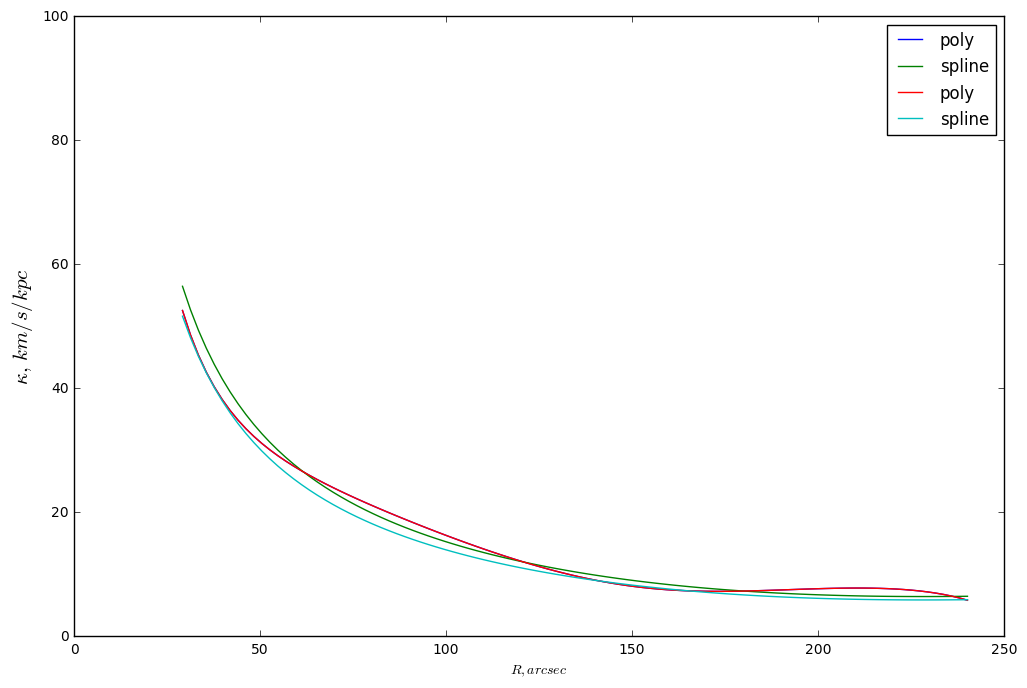

In [89]:
fig = plt.figure(figsize=[12, 8])
for ind, i in enumerate([36., 40.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    plt.plot(test_points, [epicyclicFreq_real(gas_approxes[ind], x, scale) for x in test_points], '-', label='poly')
    plt.plot(test_points, [epicyclicFreq_real(spl_gases[ind], x, scale) for x in test_points], '-', label='spline')
    print epicyclicFreq_real(spl_gases[ind], 10., scale)

def epicyclicFreq_real_(spl_gas, x, scale):
    '''продливаем дальше без производной на плато'''
    if x < 60.:
        return epicyclicFreq_real(spl_gas, x, scale)
    else:
        return sqrt(2)*arctanlaw(x, m,c,d)/(x*scale)
#     TODO: check scale multiplication
    
# plt.plot(np.linspace(1., 100., 100), [epicyclicFreq_real_(gas_approx, x, scale) for x in np.linspace(1., 100., 100)], '-', label='contin')

plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 100)
plt.legend();

In [90]:
print 145.78/159.43, np.sin(36.*np.pi/180.)/np.sin(40.*np.pi/180.)

0.914382487612 0.914431522069


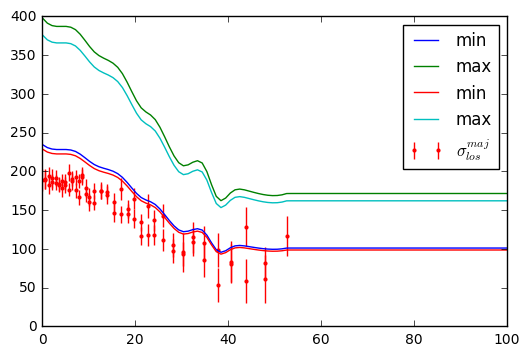

In [91]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
for ind, i in enumerate([36., 40.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
#     plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
    plt.plot(points, map(sig_R_maj_min, points), label = 'min')
    plt.plot(points, map(sig_R_maj_max, points), label = 'max')
#     plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
#     plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

In [92]:
plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')

IndentationError: unexpected indent (<ipython-input-92-c3e5af06733d>, line 12)

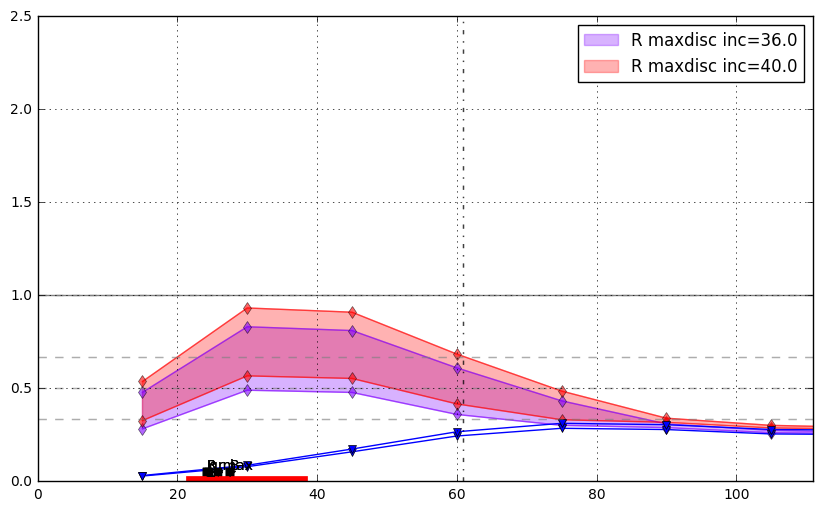

In [93]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

for ind, i in enumerate([36., 40.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gases[ind], 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 2))[ind], alpha=0.3, disk_scales=disk_scales, label='R maxdisc inc={}'.format(incl))

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.savefig('..\\..\pics\\incl_summary\\'+name+'.png', format='png', bbox_inches='tight');

In [94]:
incl = 36.

## Эксперименты

### WKB приближение

Проверка применимости WKB приближения:

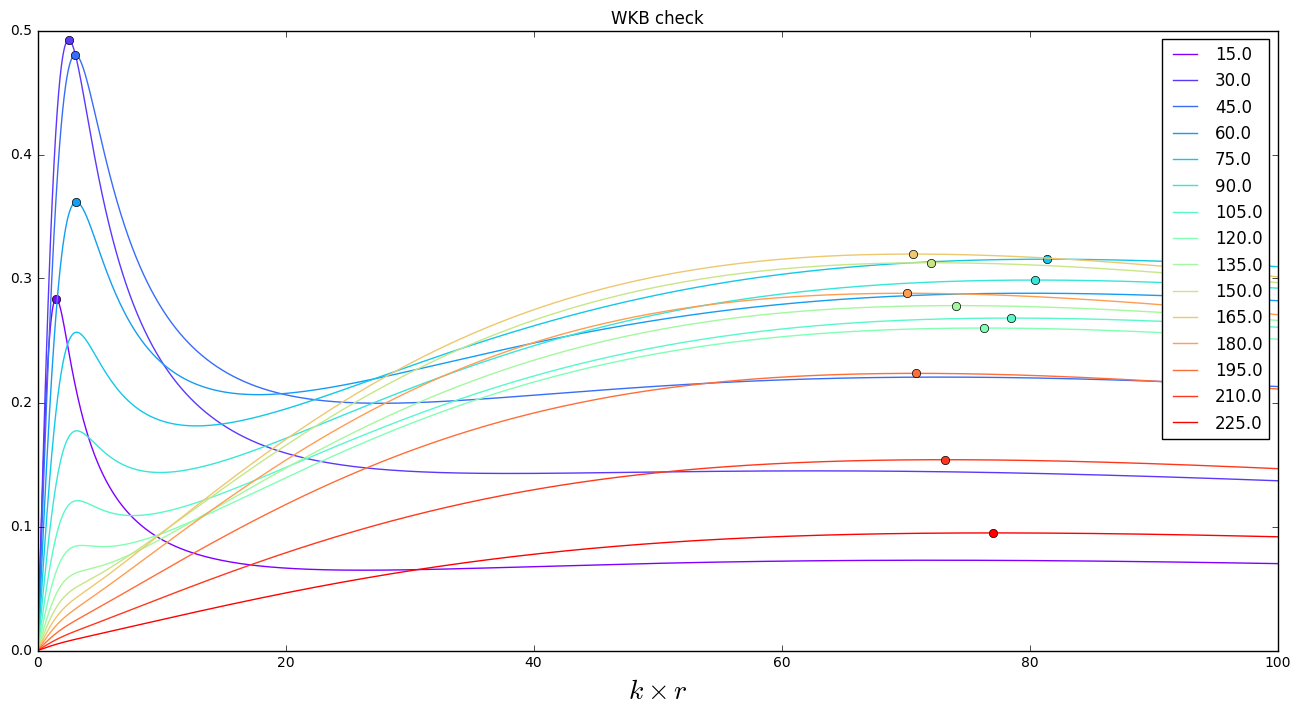

In [95]:
plot_WKB_dependencies(r_g_dens=r_g_dens[1:], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)][1:], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R') for l in r_g_dens[1:]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.xlim(0, 100);
# plt.xlim(0, 5);

Исходная картинка:

r= 15.000 Qg= 15.927 Qs=  3.797 Qg^-1=  0.063 Qs^-1=  0.263 s=  0.018
r= 30.000 Qg=  8.699 Qs=  2.200 Qg^-1=  0.115 Qs^-1=  0.455 s=  0.029
r= 45.000 Qg=  5.322 Qs=  2.286 Qg^-1=  0.188 Qs^-1=  0.437 s=  0.035
r= 60.000 Qg=  3.774 Qs=  3.115 Qg^-1=  0.265 Qs^-1=  0.321 s=  0.035
r= 75.000 Qg=  3.334 Qs=  4.539 Qg^-1=  0.300 Qs^-1=  0.220 s=  0.035
r= 90.000 Qg=  3.467 Qs=  6.830 Qg^-1=  0.288 Qs^-1=  0.146 s=  0.035
r=105.000 Qg=  3.825 Qs= 10.511 Qg^-1=  0.261 Qs^-1=  0.095 s=  0.035
r=120.000 Qg=  3.909 Qs= 16.463 Qg^-1=  0.256 Qs^-1=  0.061 s=  0.035
r=135.000 Qg=  3.630 Qs= 26.209 Qg^-1=  0.275 Qs^-1=  0.038 s=  0.035
r=150.000 Qg=  3.215 Qs= 42.454 Qg^-1=  0.311 Qs^-1=  0.024 s=  0.035
r=165.000 Qg=  3.138 Qs= 70.140 Qg^-1=  0.319 Qs^-1=  0.014 s=  0.035
r=180.000 Qg=  3.478 Qs=118.561 Qg^-1=  0.288 Qs^-1=  0.008 s=  0.035
r=195.000 Qg=  4.481 Qs=205.586 Qg^-1=  0.223 Qs^-1=  0.005 s=  0.035
r=210.000 Qg=  6.507 Qs=366.107 Qg^-1=  0.154 Qs^-1=  0.003 s=  0.035
r=225.000 Qg= 10.557

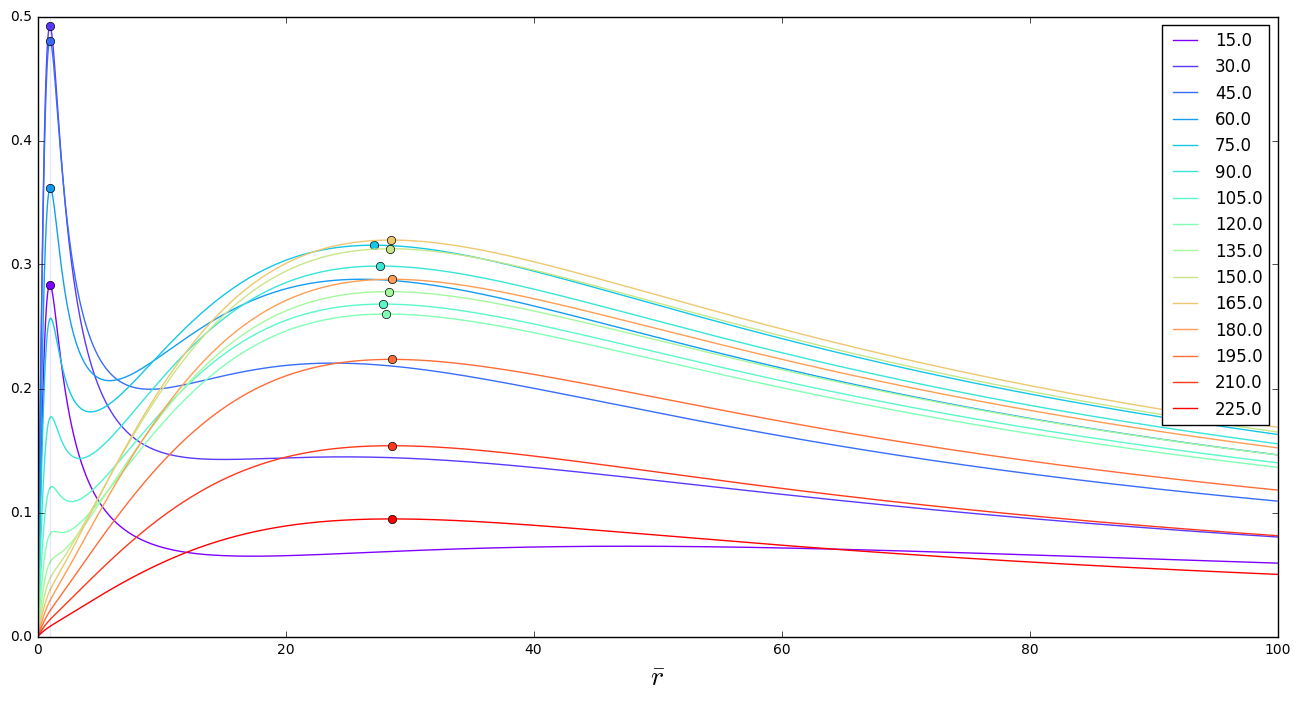

In [119]:
plot_k_dependencies(r_g_dens=r_g_dens[1:], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)][1:], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R') for l in r_g_dens[1:]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01),
                    show=True)
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Значения вокруг 1 группируются - поскольку это обусловлено видом функции первого слагаемого, у нее максимум все время около 1, а уровень определяется $Q_s$.

Слагаемые по-отдельности:

15.0 0.263400350532 0.062786330697 0.017613480218
75.0 0.22033327981 0.299967396551 0.0349760833423


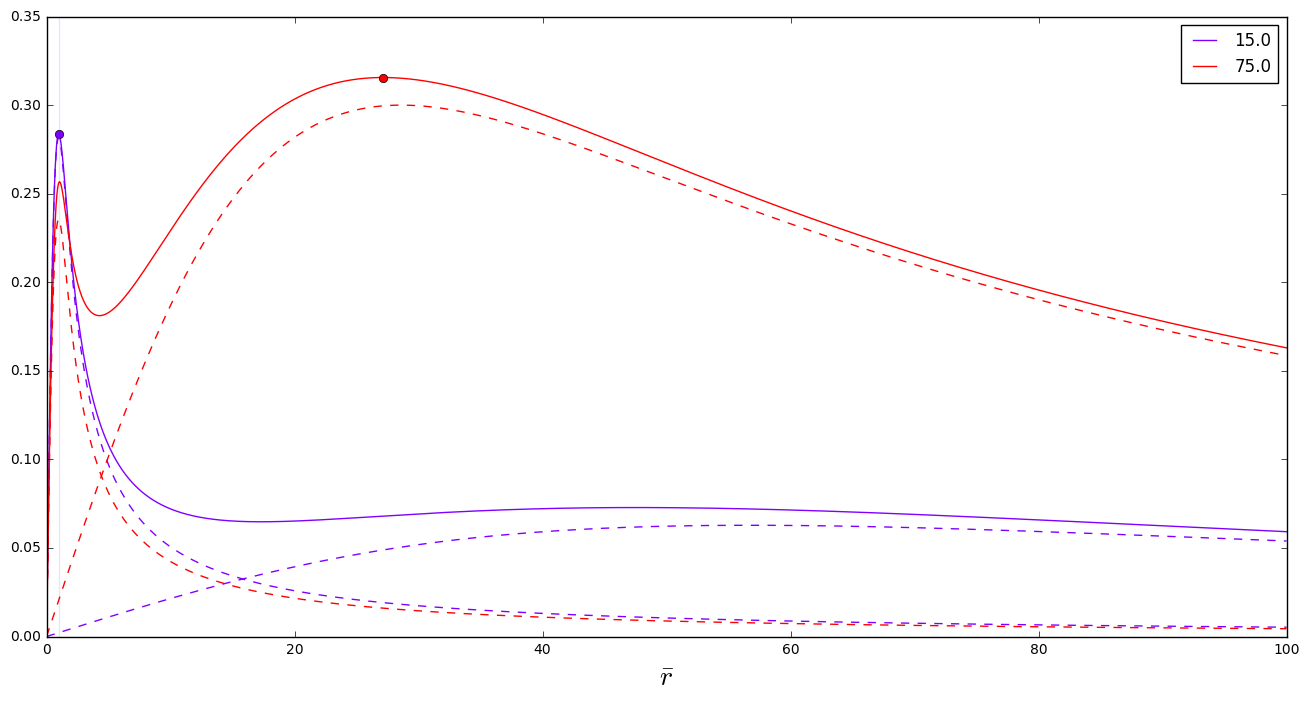

In [124]:
def plot_k_dependencies_with_parts(r_g_dens=None, gas_dens=None, epicycl=None, 
               sound_vel=None, star_density=None, sigma=None, krange=None):
    '''рисуем много зависимостей сразу'''
    Qgs, Qss, s_params = [], [], []
    maxk = 30.
    fig = plt.figure(figsize=[16,8])
    ax = plt.gca()
    colors = cm.rainbow(np.linspace(0, 1, len(r_g_dens)))
    for r, gd, sd, color in zip(r_g_dens, gas_dens, star_density, colors):
        Qgs.append(Qg(epicycl=epicycl(r), sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl(r), sigma=sigma(r), star_density=sd))
        s_params.append(sound_vel/sigma(r))
        print r, 1./Qss[-1], 1./Qgs[-1], s_params[-1]
        plot_k_dependency(Qs=Qss[-1], Qg=Qgs[-1], s=s_params[-1], krange=krange, ax=ax, label=str(r), color=color)
        def first_summand(dimlK, Qg=None, Qs=None, s=None):
            return 2. / dimlK / Qs * (1 - i0e(dimlK ** 2))
        ax.plot(krange, [first_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
        def second_summand(dimlK, Qg=None, Qs=None, s=None):
            return 2*s*dimlK / Qg / (1 + dimlK**2 * s**2)
        ax.plot(krange, [second_summand(dimlK, Qg=Qgs[-1], Qs=Qss[-1], s=s_params[-1]) for dimlK in krange], '--', color=color)
        maxk = max(maxk, findInvKinemQeffBrentq(Qss[-1], Qgs[-1], s_params[-1], krange)[0]) #not optimal
    plt.legend()
    plt.xlim(0, maxk+100.)

plot_k_dependencies_with_parts(r_g_dens=r_g_dens[1:7:4], 
                    gas_dens=[He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)][1:7:4], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R') for l in r_g_dens[1:7:4]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

### Эксперименты с картинками

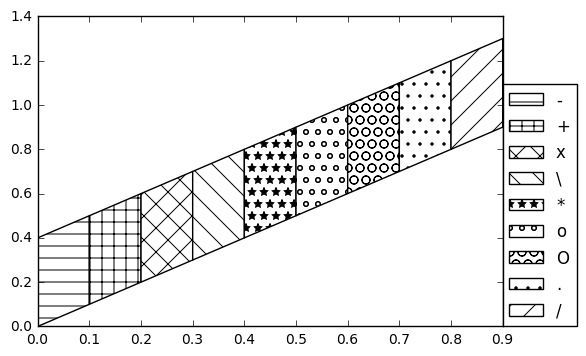

In [97]:
import random
patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.', '/')
markers = 'os<^>p*'
for ind, pattern in enumerate(patterns):
    plt.fill_between([ind*0.1, ind*0.1+0.1], [ind*0.1, ind*0.1+0.1], [ind*0.1+0.4, ind*0.1+0.5], hatch=pattern, facecolor='white', label=pattern)

plt.legend(loc=(1., 0.));

In [98]:
invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_max,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L_R, 'R')))

# invQg = map(lambda l: l*1.6, invQg)
# invQeff_min = map(lambda l: l*1.6, invQeff_min)
# invQeff_max = map(lambda l: l*1.6, invQeff_max)


invQg2, invQs2, invQeff_min2 = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_max,
                                star_density=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=6.80, band='g')))

invQg2, invQs2, invQeff_max2 = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_min,
                                star_density=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=6.80, band='g')))

# invQeff_min2 = map(lambda l: l*1.6, invQeff_min2)
# invQeff_max2 = map(lambda l: l*1.6, invQeff_max2)

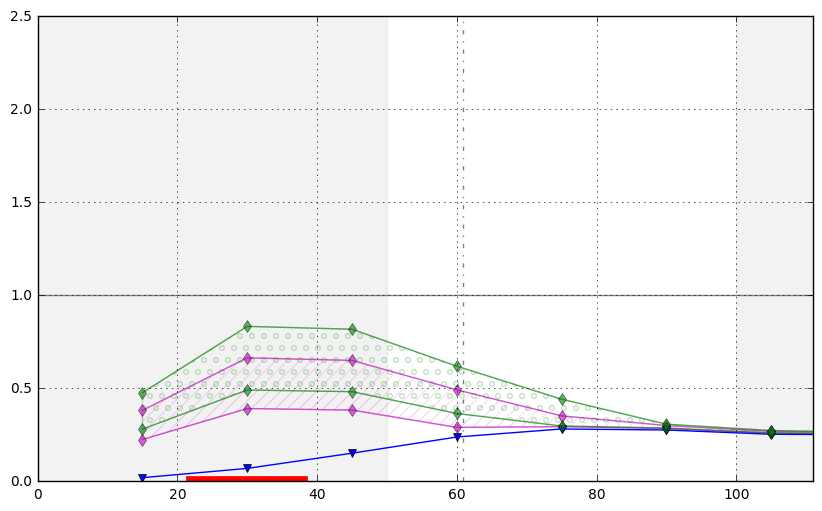

In [99]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

rr = zip(*total_gas_data)[0]

ax.fill_between(rr, invQeff_min, invQeff_max, alpha=0.2, label='R max', hatch='//', color='white', edgecolor='m')
ax.plot(rr, invQeff_min, 'd-', color='m', alpha=0.6)
ax.plot(rr, invQeff_max, 'd-', color='m', alpha=0.6)
ax.plot(rr, invQg, 'v-', color='b')

ax.fill_between(rr, invQeff_min2, invQeff_max2, alpha=0.2, label='g max', hatch='o', color='white', edgecolor='g')
ax.plot(rr, invQeff_min2, 'd-', color='g', alpha=0.6)
ax.plot(rr, invQeff_max2, 'd-', color='g', alpha=0.6)

# ax.set_ylim(0., 1.5)
ax.set_xlim(0., data_lim+50.)
# #     plot_SF(ax)
plot_data_lim(ax, data_lim)
# for h, annot in disk_scales:
#     plot_disc_scale(h, ax, annot)
# ax.legend()

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
foreground_zebra(ax, 50, 0.1);

Картинка с влияние ошибок:

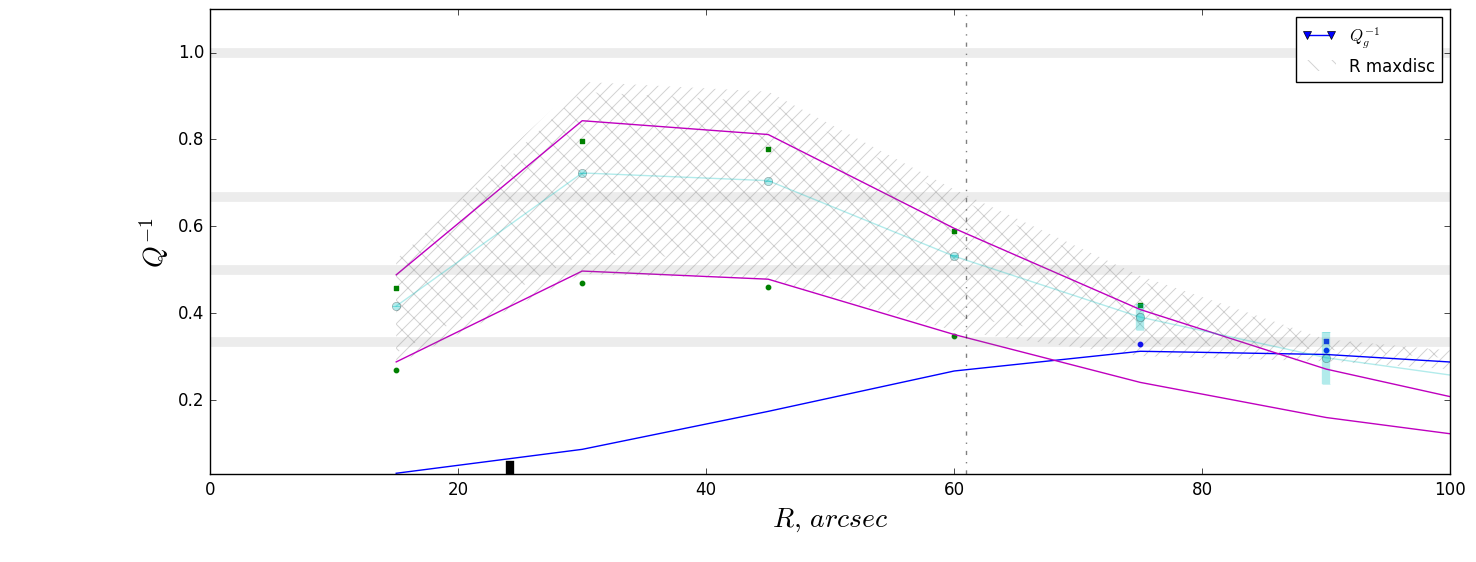

In [104]:
#incl variation

gas_approxes = []
spl_gases = []

for i in [36., 40.]:
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    # Данные по кинематике газа Struve, WSRT (не исправлено за наклон)
    r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))
    r_wsrt, vel_wsrt, e_vel_wsrt = correct_rotation_curve(r_wsrt, vel_wsrt, e_vel_wsrt,  0.0, v0, incl)

    # Данные по кинематике газа Noordermee 2007, WSRT (не исправлено за наклон?)
    r_noord, vel_noord, e_vel_noord = zip(*np.loadtxt("v_gas_noord.dat", float))
    r_noord, vel_noord, e_vel_noord = correct_rotation_curve(r_noord, vel_noord, e_vel_noord,  0.0, v0, incl)

    gas_approx = poly1d(polyfit(r_ma_n, vel_ma_n, deg=5))
    test_points = np.linspace(min(r_ma_n), max(r_ma_n), 100)
    gas_approxes.append(gas_approx)

    spl_gas = inter.UnivariateSpline(r_noord, vel_noord, k=3, s=10000.)
    spl_gases.append(spl_gas)

incl_varQ = []

for ind, i in enumerate([36., 40.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    
    invQg, invQs1, invQeff_min = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gases[ind],
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_max,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R')))

    invQg, invQs2, invQeff_max = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gases[ind],
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_min,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R')))
    
    incl_varQ.append([invQeff_min, invQeff_max])
    
incl = 36.
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)



def plot_2f_vs_1f_tmp(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None):
    '''Картинка сравнения 2F и 1F критерия для разных фотометрий и величин sig_R, 
    куда подается весь газ, результат НЕ исправляется за осесимметричные возмущения.'''

    invQg, invQs1, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs2, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, alpha=0.35, hatch='\\', facecolor="none", edgecolor="gray", linewidth=0.0, label=label)
#     ax.plot(rr, invQeff_min, '-', color=color, alpha=0.6)
#     ax.plot(rr, invQeff_max, '-', color=color, alpha=0.6)
    ax.plot(rr, invQg, '-', color='b')
    ax.plot(rr, invQs1, '-', color='m')
    ax.plot(rr, invQs2, '-', color='m')

    ax.set_ylim(0., 1.5)
    ax.set_xlim(0., data_lim+50.)
#     plot_SF(ax)
    plot_data_lim(ax, data_lim)
    for h, annot in disk_scales:
        plot_disc_scale(h, ax, annot)
#     plot_Q_levels(ax, [1., 1.5, 2., 3.])
    ax.legend()
    return invQeff_min, invQeff_max

fig = plt.figure(figsize=[16,6])
ax = plt.gca()
disk_scales2 = []
disk_scales2.append((24.20 , 'R'))

ax.plot([0, 1], [-1, -2], 'v-', color='b', label=r'$Q_g^{-1}$')

invQeff_min, invQeff_max = plot_2f_vs_1f_tmp(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.15, disk_scales=disk_scales2, label='R maxdisc')

# ax.fill_between(r_g_dens[1:], invQeff_max, incl_varQ[1][1], alpha=0.1, color='y')
# ax.fill_between(r_g_dens[1:], invQeff_min, incl_varQ[0][0], alpha=0.1, color='y')
ax.fill_between(r_g_dens[1:], incl_varQ[0][0], incl_varQ[1][1], alpha=0.35, hatch='//', facecolor="none", edgecolor="gray", linewidth=0.0)

ax.set_ylim(0.03, 1.1)
ax.set_xlim(0., 100.)
ax.plot([70., 80.], [0., 0.], '-', lw=5., color='red')
ax.plot([190., 210.], [0., 0.], '-', lw=5., color='red')
ax.plot([0., 70.], [0., 0.], '-', lw=3., color='red')
# ax.grid()

for q_ in [1., 1.5, 2., 3.]:
    ax.axhline(y=1./q_, lw=7, alpha=0.15, color='grey')

ax.set_ylabel(r'$Q^{-1}$', fontsize=20)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=20)
# ax.fill_between([61., 130.], [0., 0.], [2., 2.], hatch='.', color='gray', alpha=0.08)

# ax2 = ax.twinx()
# ax2.fill_between(r_g_dens, [0.]*len(r_g_dens), [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], alpha=0.08, color='y')
# ax2.set_ylabel(r'$\Sigma_g$', fontsize=20)
# ax2.tick_params('y')
# ax2.set_xlim(0., 100.)
# ax2.set_ylim(0., 10.)

def plot_param_depend_tmp(ax=None, N=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, **kwargs):

    params = kwargs.copy()
       
    for p in params.keys():
        if p == 'total_gas_data':
            depth = lambda L: isinstance(L, list) and max(map(depth, L))+1 #depth of nested lists
            if depth(params[p]) == 1:
                params[p] = [params[p]]*N
        elif type(params[p]) is not list:
            params[p] = [params[p]]*N
                
    result = []
    for i in range(N):

        invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=params['total_gas_data'][i], 
                                        epicycl=params['epicycl'][i], 
                                        gas_approx=params['gas_approx'][i],
                                        sound_vel=params['sound_vel'][i], 
                                        scale=params['scale'][i],
                                        sigma=params['sigma_max'][i],
                                        star_density=params['star_density_min'][i]))

        invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=params['total_gas_data'][i], 
                                        epicycl=params['epicycl'][i], 
                                        gas_approx=params['gas_approx'][i],
                                        sound_vel=params['sound_vel'][i], 
                                        scale=params['scale'][i],
                                        sigma=params['sigma_min'][i],
                                        star_density=params['star_density_max'][i]))


        result.append((invQeff_min, invQeff_max))
    
    rr = zip(*params['total_gas_data'][0])[0]
    qmins = []
    qmaxs = []
    for ind, rrr in enumerate(rr):
        qmin = [result[l][0][ind] for l in range(len(result))]
        qmax = [result[l][1][ind] for l in range(len(result))]
        qmins.append((np.mean(qmin), np.std(qmin)))
        qmaxs.append((np.mean(qmax), np.std(qmax)))
    ax.errorbar(rr, (np.array(zip(*qmins)[0])+np.array(zip(*qmaxs)[0]))/2., fmt='o-', yerr=(np.array(zip(*qmins)[1])+np.array(zip(*qmaxs)[1]))/2., elinewidth=6, alpha=0.3, color='c');
#     ax.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
    
plot_param_depend_tmp(ax=ax, data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 20,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=list(np.linspace(4., 15., 20)), 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'))


def plot_RF13_vs_2F_tmp(ax=ax, r_g_dens=None, HI_gas_dens=None, CO_gas_dens=None, epicycl=None, sound_vel=None, sigma_R_max=None, sigma_R_min=None,  
           star_density=None, alpha_max=None, alpha_min=None, scale=None, gas_approx=None, thin=True, show=False):
    '''Плотности газа передаются не скорр. за гелий.'''
    
    if thin:
        romeo_Q = romeo_Qinv_thin
    else:
        romeo_Q = romeo_Qinv
           
    totgas = zip(r_g_dens, [He_coeff*(l[0]+l[1]) for l in zip(HI_gas_dens, CO_gas_dens)])[1:]
    
    if show:
        print 'sig_R_max case:'
    romeo_min = []
    for r, g, co in zip(r_g_dens, HI_gas_dens, CO_gas_dens):
        rom, _ = romeo_Q(r=r, epicycl=epicycl, sound_vel=sound_vel, sigma_R=sigma_R_max, 
               star_density=star_density, HI_density=He_coeff*g, CO_density=He_coeff*co, 
                         alpha=alpha_min, scale=scale, gas_approx=gas_approx, show=show)
        romeo_min.append(rom)
        if _ == 'star':
            color = 'g' 
        elif _ == 'HI':
            color = 'b'
        else:
            color = 'm'
        ax.scatter(r, rom, 10, marker='o', color=color)


    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=totgas, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_R_max,
                                    star_density=star_density))

    if show:
        print 'sig_R_min case:'
    
    romeo_max = []
    for r, g, co in zip(r_g_dens, HI_gas_dens, CO_gas_dens):
        rom, _ = romeo_Q(r=r, epicycl=epicycl, sound_vel=sound_vel, sigma_R=sigma_R_min, 
               star_density=star_density, HI_density=He_coeff*g, CO_density=He_coeff*co, 
                         alpha=alpha_max, scale=scale, gas_approx=gas_approx, show=show)
        romeo_max.append(rom)
        if _ == 'star':
            color = 'g' 
        elif _ == 'HI':
            color = 'b'
        else:
            color = 'm'
        ax.scatter(r, rom, 10, marker = 's', color=color)
    
plot_RF13_vs_2F_tmp(ax=ax, r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_R) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=6., sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

    
# ax.set_yscale('log')
# ax2.set_yscale('log')
plt.show()

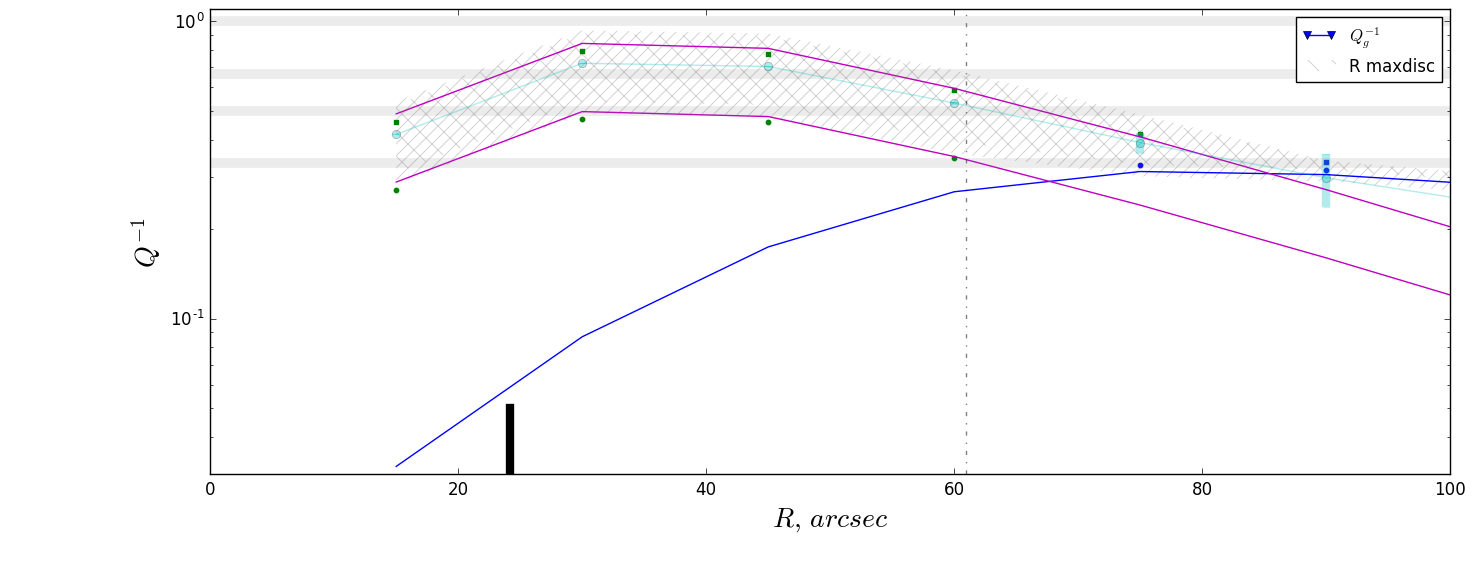

In [105]:
#incl variation

gas_approxes = []
spl_gases = []

for i in [36., 40.]:
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    # Данные по кинематике газа Struve, WSRT (не исправлено за наклон)
    r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))
    r_wsrt, vel_wsrt, e_vel_wsrt = correct_rotation_curve(r_wsrt, vel_wsrt, e_vel_wsrt,  0.0, v0, incl)

    # Данные по кинематике газа Noordermee 2007, WSRT (не исправлено за наклон?)
    r_noord, vel_noord, e_vel_noord = zip(*np.loadtxt("v_gas_noord.dat", float))
    r_noord, vel_noord, e_vel_noord = correct_rotation_curve(r_noord, vel_noord, e_vel_noord,  0.0, v0, incl)

    gas_approx = poly1d(polyfit(r_ma_n, vel_ma_n, deg=5))
    test_points = np.linspace(min(r_ma_n), max(r_ma_n), 100)
    gas_approxes.append(gas_approx)

    spl_gas = inter.UnivariateSpline(r_noord, vel_noord, k=3, s=10000.)
    spl_gases.append(spl_gas)

incl_varQ = []

for ind, i in enumerate([36., 40.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    
    invQg, invQs1, invQeff_min = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gases[ind],
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_max,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R')))

    invQg, invQs2, invQeff_max = zip(*get_invQeff_from_data(gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                                    epicycl=epicyclicFreq_real, 
                                    gas_approx=spl_gases[ind],
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sig_R_maj_min,
                                    star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R')))
    
    incl_varQ.append([invQeff_min, invQeff_max])
    
incl = 36.
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)



def plot_2f_vs_1f_tmp(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None):
    '''Картинка сравнения 2F и 1F критерия для разных фотометрий и величин sig_R, 
    куда подается весь газ, результат НЕ исправляется за осесимметричные возмущения.'''

    invQg, invQs1, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs2, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))
    
    rr = zip(*total_gas_data)[0]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, alpha=0.35, hatch='\\', facecolor="none", edgecolor="gray", linewidth=0.0, label=label)
#     ax.plot(rr, invQeff_min, '-', color=color, alpha=0.6)
#     ax.plot(rr, invQeff_max, '-', color=color, alpha=0.6)
    ax.plot(rr, invQg, '-', color='b')
    ax.plot(rr, invQs1, '-', color='m')
    ax.plot(rr, invQs2, '-', color='m')

    ax.set_ylim(0., 1.5)
    ax.set_xlim(0., data_lim+50.)
#     plot_SF(ax)
    plot_data_lim(ax, data_lim)
    for h, annot in disk_scales:
        plot_disc_scale(h, ax, annot)
#     plot_Q_levels(ax, [1., 1.5, 2., 3.])
    ax.legend()
    return invQeff_min, invQeff_max

fig = plt.figure(figsize=[16,6])
ax = plt.gca()
disk_scales2 = []
disk_scales2.append((24.20 , 'R'))

ax.plot([0, 1], [-1, -2], 'v-', color='b', label=r'$Q_g^{-1}$')

invQeff_min, invQeff_max = plot_2f_vs_1f_tmp(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  data_lim=data_lim, color='g', alpha=0.15, disk_scales=disk_scales2, label='R maxdisc')

# ax.fill_between(r_g_dens[1:], invQeff_max, incl_varQ[1][1], alpha=0.1, color='y')
# ax.fill_between(r_g_dens[1:], invQeff_min, incl_varQ[0][0], alpha=0.1, color='y')
ax.fill_between(r_g_dens[1:], incl_varQ[0][0], incl_varQ[1][1], alpha=0.35, hatch='//', facecolor="none", edgecolor="gray", linewidth=0.0)

ax.set_ylim(0.03, 1.1)
ax.set_xlim(0., 100.)
ax.plot([70., 80.], [0., 0.], '-', lw=5., color='red')
ax.plot([190., 210.], [0., 0.], '-', lw=5., color='red')
ax.plot([0., 70.], [0., 0.], '-', lw=3., color='red')
# ax.grid()

for q_ in [1., 1.5, 2., 3.]:
    ax.axhline(y=1./q_, lw=7, alpha=0.15, color='grey')

ax.set_ylabel(r'$Q^{-1}$', fontsize=20)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=20)
# ax.fill_between([61., 130.], [0., 0.], [2., 2.], hatch='.', color='gray', alpha=0.08)

# ax2 = ax.twinx()
# ax2.fill_between(r_g_dens, [0.]*len(r_g_dens), [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], alpha=0.08, color='y')
# ax2.set_ylabel(r'$\Sigma_g$', fontsize=20)
# ax2.tick_params('y')
# ax2.set_xlim(0., 100.)
# ax2.set_ylim(0., 10.)

def plot_param_depend_tmp(ax=None, N=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, **kwargs):

    params = kwargs.copy()
       
    for p in params.keys():
        if p == 'total_gas_data':
            depth = lambda L: isinstance(L, list) and max(map(depth, L))+1 #depth of nested lists
            if depth(params[p]) == 1:
                params[p] = [params[p]]*N
        elif type(params[p]) is not list:
            params[p] = [params[p]]*N
                
    result = []
    for i in range(N):

        invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=params['total_gas_data'][i], 
                                        epicycl=params['epicycl'][i], 
                                        gas_approx=params['gas_approx'][i],
                                        sound_vel=params['sound_vel'][i], 
                                        scale=params['scale'][i],
                                        sigma=params['sigma_max'][i],
                                        star_density=params['star_density_min'][i]))

        invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=params['total_gas_data'][i], 
                                        epicycl=params['epicycl'][i], 
                                        gas_approx=params['gas_approx'][i],
                                        sound_vel=params['sound_vel'][i], 
                                        scale=params['scale'][i],
                                        sigma=params['sigma_min'][i],
                                        star_density=params['star_density_max'][i]))


        result.append((invQeff_min, invQeff_max))
    
    rr = zip(*params['total_gas_data'][0])[0]
    qmins = []
    qmaxs = []
    for ind, rrr in enumerate(rr):
        qmin = [result[l][0][ind] for l in range(len(result))]
        qmax = [result[l][1][ind] for l in range(len(result))]
        qmins.append((np.mean(qmin), np.std(qmin)))
        qmaxs.append((np.mean(qmax), np.std(qmax)))
    ax.errorbar(rr, (np.array(zip(*qmins)[0])+np.array(zip(*qmaxs)[0]))/2., fmt='o-', yerr=(np.array(zip(*qmins)[1])+np.array(zip(*qmaxs)[1]))/2., elinewidth=6, alpha=0.3, color='c');
#     ax.errorbar(rr, zip(*qmaxs)[0], fmt='o-', yerr=zip(*qmaxs)[1])
    
plot_param_depend_tmp(ax=ax, data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maxdisc', N = 20,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=list(np.linspace(4., 15., 20)), 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'))


def plot_RF13_vs_2F_tmp(ax=ax, r_g_dens=None, HI_gas_dens=None, CO_gas_dens=None, epicycl=None, sound_vel=None, sigma_R_max=None, sigma_R_min=None,  
           star_density=None, alpha_max=None, alpha_min=None, scale=None, gas_approx=None, thin=True, show=False):
    '''Плотности газа передаются не скорр. за гелий.'''
    
    if thin:
        romeo_Q = romeo_Qinv_thin
    else:
        romeo_Q = romeo_Qinv
           
    totgas = zip(r_g_dens, [He_coeff*(l[0]+l[1]) for l in zip(HI_gas_dens, CO_gas_dens)])[1:]
    
    if show:
        print 'sig_R_max case:'
    romeo_min = []
    for r, g, co in zip(r_g_dens, HI_gas_dens, CO_gas_dens):
        rom, _ = romeo_Q(r=r, epicycl=epicycl, sound_vel=sound_vel, sigma_R=sigma_R_max, 
               star_density=star_density, HI_density=He_coeff*g, CO_density=He_coeff*co, 
                         alpha=alpha_min, scale=scale, gas_approx=gas_approx, show=show)
        romeo_min.append(rom)
        if _ == 'star':
            color = 'g' 
        elif _ == 'HI':
            color = 'b'
        else:
            color = 'm'
        ax.scatter(r, rom, 10, marker='o', color=color)


    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=totgas, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_R_max,
                                    star_density=star_density))

    if show:
        print 'sig_R_min case:'
    
    romeo_max = []
    for r, g, co in zip(r_g_dens, HI_gas_dens, CO_gas_dens):
        rom, _ = romeo_Q(r=r, epicycl=epicycl, sound_vel=sound_vel, sigma_R=sigma_R_min, 
               star_density=star_density, HI_density=He_coeff*g, CO_density=He_coeff*co, 
                         alpha=alpha_max, scale=scale, gas_approx=gas_approx, show=show)
        romeo_max.append(rom)
        if _ == 'star':
            color = 'g' 
        elif _ == 'HI':
            color = 'b'
        else:
            color = 'm'
        ax.scatter(r, rom, 10, marker = 's', color=color)
    
plot_RF13_vs_2F_tmp(ax=ax, r_g_dens=r_g_dens, HI_gas_dens=gas_dens, CO_gas_dens=[y_interp_(l, h_disc_R) for l in r_g_dens], 
                epicycl=epicyclicFreq_real, sound_vel=6., sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 5.53, 'R'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

    
ax.set_yscale('log')
# ax2.set_yscale('log')
plt.show()

### CALIFA карта

In [100]:
# --------------------------------------------------------------------------------
#  Column       Description
# --------------------------------------------------------------------------------
# SPEC_ID     ID of the spectra in each spaxel
# BIN_ID      ID of the Voronoi bin
# X	    X-axis spaxel coordinates (in arcsec), relative to the center of the galaxy (see **)
# Y	    Y-axis spaxel coordinates (in arcsec), relative to the center of the galaxy (see **)
# XBIN	    X-axis Voronoi centroid coordinates (in arcsec), relative to the center of the galaxy (see **)
# YBIN	    Y-axis Voronoi centroid coordinates (in arcsec), relative to the center of the galaxy (see **)
# FLUX	    Average flux (in arbitrary units) of the spaxel
# FLUXBIN     Average surface brightness in B-band (in mag arcsec-2) of the Voronoi bin
# NSPAXS      Number of spaxels combined to create the Voronoi bin
# SNR_SPAX    Signal-to-noise ratio computed for the individual spaxels
# SNR_BIN     Signal-to-noise ratio of the Voronoi bin computed after the pPXF fit
# Vp	    Average stellar velocity from the MonteCarlo simulations (in km/s) to the Voronoi bin spectra 
# DVp	    Standard deviation of the stellar velocity from the MonteCarlo simulations (in km/s) to the Voronoi bin spectra
# Sp	    Average stellar velocity dispersion from the MonteCarlo simulations (in km/s) to the Voronoi bin spectra 
# DSp	    Standard deviation of the stellar velocity dispersion from the MonteCarlo simulations (in km/s) to the Voronoi bin spectra
# Chi2        Average Chi2 from the MonteCarlo simulations (arbitrary scale) for each Voronoi bin
# QC          Average Quality control parameter from the MonteCarlo simulations for each Voronoi bin (see ***)
# --------------------------------------------------------------------------------

In [101]:
from astropy.io import fits

In [102]:
tbhdu = fits.BinTableHDU.readfrom('NGC1167.CALIFA.V1200.stekin.fits')

In [103]:
tbhdu.header

SIMPLE  = 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /File contains extensions                        
DATE    = '2016-09-14'         /                                                
CALIFAID=                  119 /                                                
XCEN    =              36.0000 /                                                
YCEN    =              33.0000 /                                                

In [104]:
os.chdir(data_path)

In [105]:
hdu_list = fits.open('NGC1167.CALIFA.V1200.stekin.fits')

In [106]:
hdu_list.info()

Filename: NGC1167.CALIFA.V1200.stekin.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       8   ()              
1    CALIFA_STEKIN  BinTableHDU     44   5694R x 17C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   


In [107]:
image_data = hdu_list[1].data

In [108]:
image_data = fits.getdata('NGC1167.CALIFA.V1200.stekin.fits')

In [109]:
image_data

FITS_rec([ (  1.00000000e+00, -999.9, -35., -32., -1000.9, -1000.9,  0., -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9),
       (  2.00000000e+00, -999.9, -34., -32., -1000.9, -1000.9,  0., -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9),
       (  3.00000000e+00, -999.9, -33., -32., -1000.9, -1000.9,  0., -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9),
       ...,
       (  5.69200000e+03, -999.9,  40.,  40., -1000.9, -1000.9,  0., -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9),
       (  5.69300000e+03, -999.9,  41.,  40., -1000.9, -1000.9,  0., -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9),
       (  5.69400000e+03, -999.9,  42.,  40., -1000.9, -1000.9,  0., -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9, -999.9)], 
      dtype=(numpy.record, [('SPEC_ID', '>f8'), ('BIN_ID', '>f8'), ('X', '>f8'), (

In [110]:
image_data[3000]

(3001.0, 93.0, 1.0, 6.0, 1.0, 7.0, 0.55795533986531787, 20.224507231745271, 1.0, 18.062288284301758, 23.871677398681641, 4876.5736117924862, 5.4877567609961222, 180.80364991942116, 5.6293545066332955, 0.0010629274486297655, 0.038066188249927656)

In [111]:
fdata = []
for row in image_data:
    fdata.append([float(row[2]), float(row[3]), float(row[13])])

In [112]:
len(fdata)

5694

In [113]:
fdata = np.array(fdata)

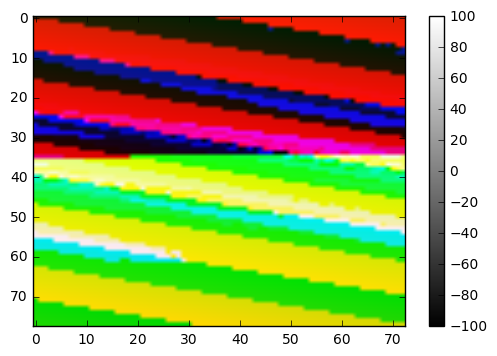

In [114]:
plt.imshow(fdata.reshape(78, 73, 3), cmap='gray', aspect='auto')
cax = plt.clim(100.,-100.)
plt.colorbar(cax=cax)

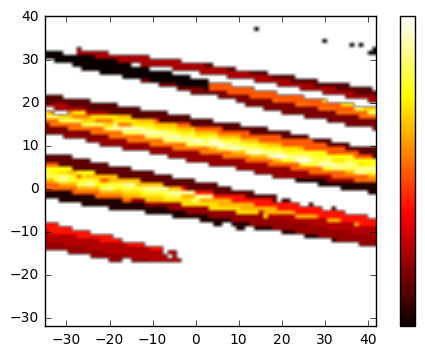

In [115]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
x, y, z = zip(*np.array(fdata))

z = np.array(z).reshape(78, 73)
plt.imshow(z+10, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)),
        cmap=cm.hot, norm=LogNorm())
plt.colorbar();

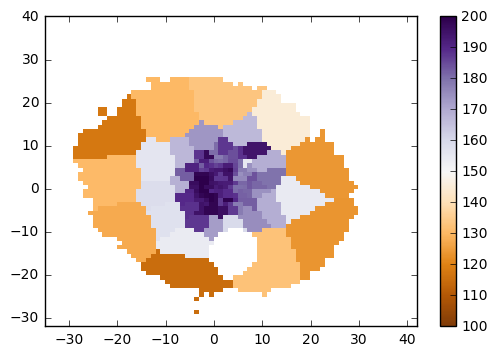

In [116]:
# Sample data

x, y, z = zip(*np.array(fdata))
X,Y = np.meshgrid(np.linspace(-35.,42.,78),np.linspace(-32.,40.,73))
Z = np.array(z).reshape(73, 78)

Z[Z < 0] = 0.

quadmesh = plt.pcolormesh(X,Y,Z, cmap=cm.PuOr)
quadmesh.set_clim(vmin=100., vmax=200.)
plt.colorbar()

quadmesh.cmap.set_under('white')

plt.xlim(-35., 42.)
plt.ylim(-32., 40.);

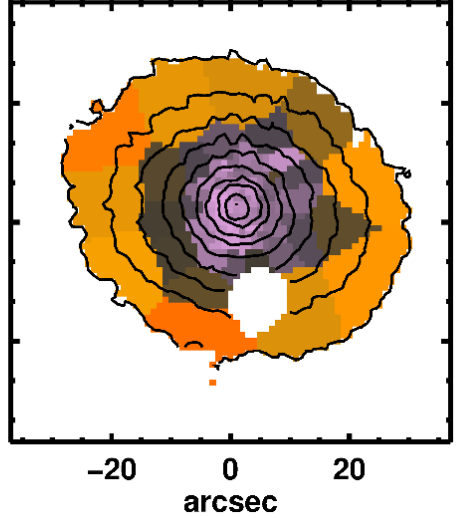

In [117]:
Image('califa_disp_map.png')

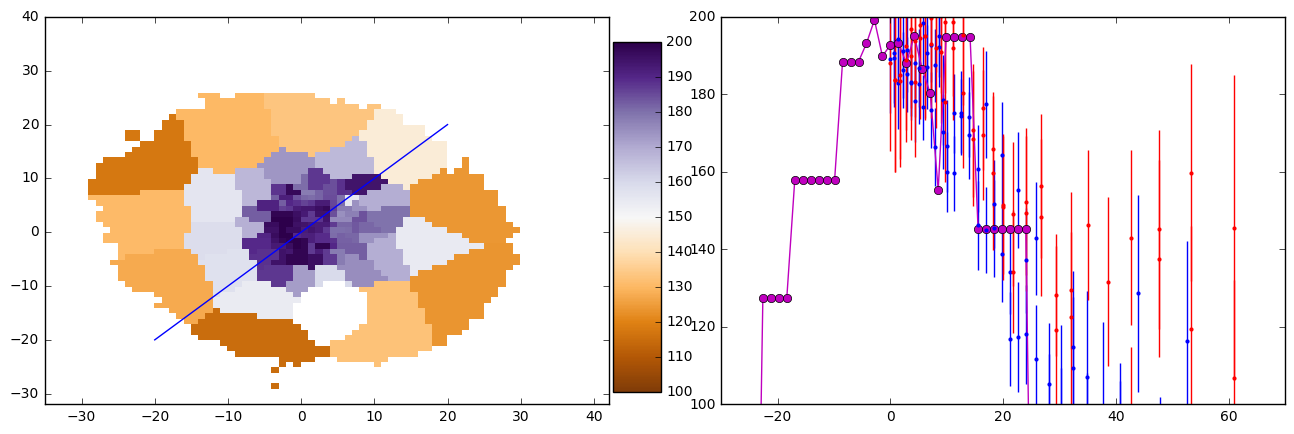

In [118]:
# Sample data

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16, 5])

quadmesh = ax1.pcolormesh(X,Y,Z, cmap=cm.PuOr)
quadmesh.set_clim(vmin=100., vmax=200.)

cax = fig.add_axes([0.48, 0.15, 0.03, 0.7])
fig.colorbar(quadmesh, cax=cax)

quadmesh.cmap.set_under('white')

ax1.plot([-20., 20.], [-20., 20.], '-')

ax1.set_xlim(-35., 42.)
ax1.set_ylim(-32., 40.)

line_data = []
for xpix in range(-20, 20):
    ypix = xpix
    line_data.append((np.sign(xpix)*np.sqrt(xpix**2 + ypix**2), Z[ypix+32][xpix+35]))
    
ax2.plot(zip(*line_data)[0], zip(*line_data)[1], 'o-', color='m')
ax2.set_ylim(100.)

ax2.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue', label='$\sigma_{los}^{maj}$')
ax2.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$');